### 安装配置环境

In [1]:
!pip install numpy pandas scikit-learn matplotlib seaborn requests tqdm opencv-python pillow kaleido -i https://pypi.tuna.tsinghua.edu.cn/simple

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     |████████████████████████████████| 293 kB 46.6 MB/s eta 0:00:01
     |████████████████████████████████| 79.9 MB 76.2 MB/s eta 0:00:01


In [2]:
!pip3 install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu113

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple, https://download.pytorch.org/whl/cu113


#### 下载中文字体文件

In [1]:
# Linux操作系统，例如 云GPU平台：https://featurize.cn/?s=d7ce99f842414bfcaea5662a97581bd1
# 如果报错 Unable to establish SSL connection.，重新运行本代码块即可
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf -O /environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
!rm -rf /home/featurize/.cache/matplotlib

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rc("font",family='SimHei') # 中文字体
plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

--2023-01-27 13:11:34--  https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf
正在连接 172.16.0.13:5848... 已连接。
已发出 Proxy 请求，正在等待回应... 200 OK
长度： 10050868 (9.6M) [application/x-font-ttf]
正在保存至: “/environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf”

/environment/minico 100%[===================>]   9.58M  15.8MB/s    用时 0.6s    

2023-01-27 13:11:35 (15.8 MB/s) - 已保存 “/environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf” [10050868/10050868])



### 准备图像分类数据集和模型文件

#### 下载样例数据集

In [4]:
# 下载数据集压缩包
# !wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/fruit30/fruit30_split.zip

In [5]:
# 解压
# !unzip fruit30_split.zip >> /dev/null
# 删除压缩包
# !rm fruit30_split.zip

In [6]:
# 下载 类别名称 和 ID索引号 的映射字典
# !wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/fruit30/idx_to_labels.npy

#### 查看数据集目录结构

In [7]:
!sudo snap install tree

tree 1.8.0+pkg-3fd6 已从 林博仁(Buo-ren, Lin) (brlin) 安装      -42ms


In [8]:
!tree fruit30_split -L 2

locales-launch: Data of zh_CN locale not found, generating, please wait...
fruit30_split
├── train
│   ├── 菠萝
│   ├── 草莓
│   ├── 车厘子
│   ├── 桂圆
│   ├── 哈密瓜
│   ├── 胡萝卜
│   ├── 黄瓜
│   ├── 火龙果
│   ├── 苦瓜
│   ├── 梨
│   ├── 荔枝
│   ├── 榴莲
│   ├── 芒果
│   ├── 猕猴桃
│   ├── 柠檬
│   ├── 苹果-红
│   ├── 苹果-青
│   ├── 葡萄-白
│   ├── 葡萄-红
│   ├── 脐橙
│   ├── 砂糖橘
│   ├── 山竹
│   ├── 圣女果
│   ├── 石榴
│   ├── 西瓜
│   ├── 西红柿
│   ├── 香蕉
│   ├── 杨梅
│   ├── 椰子
│   └── 柚子
└── val
    ├── 菠萝
    ├── 草莓
    ├── 车厘子
    ├── 桂圆
    ├── 哈密瓜
    ├── 胡萝卜
    ├── 黄瓜
    ├── 火龙果
    ├── 苦瓜
    ├── 梨
    ├── 荔枝
    ├── 榴莲
    ├── 芒果
    ├── 猕猴桃
    ├── 柠檬
    ├── 苹果-红
    ├── 苹果-青
    ├── 葡萄-白
    ├── 葡萄-红
    ├── 脐橙
    ├── 砂糖橘
    ├── 山竹
    ├── 圣女果
    ├── 石榴
    ├── 西瓜
    ├── 西红柿
    ├── 香蕉
    ├── 杨梅
    ├── 椰子
    └── 柚子

62 directories, 0 files


#### 训练好的模型文件

In [9]:
# 下载样例模型文件
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/checkpoints/fruit30_pytorch_20220814.pth -P checkpoints

--2023-01-27 12:23:24--  https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/checkpoints/fruit30_pytorch_20220814.pth
正在连接 172.16.0.13:5848... 已连接。
已发出 Proxy 请求，正在等待回应... 200 OK
长度： 44854477 (43M) [binary/octet-stream]
正在保存至: “checkpoints/fruit30_pytorch_20220814.pth.1”

fruit30_pytorch_202 100%[===================>]  42.78M  26.1MB/s    用时 1.6s    

2023-01-27 12:23:26 (26.1 MB/s) - 已保存 “checkpoints/fruit30_pytorch_20220814.pth.1” [44854477/44854477])



### 测试集图像分类预测结果

In [65]:
import os
from tqdm import tqdm

import numpy as np
import pandas as pd

from PIL import Image

import torch
import torch.nn.functional as F

# 有 GPU 就用 GPU，没有就用 CPU
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('device', device)

device cuda:0


#### 图像预处理

只需要对测试集图像进行预处理

In [69]:
from torchvision import transforms

# # 训练集图像预处理：缩放裁剪、图像增强、转 Tensor、归一化
# train_transform = transforms.Compose([transforms.RandomResizedCrop(224),
#                                       transforms.RandomHorizontalFlip(),
#                                       transforms.ToTensor(),
#                                       transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
#                                      ])

# 测试集图像预处理-RCTN：缩放、裁剪、转 Tensor、归一化
test_transform = transforms.Compose([transforms.Resize(256),
                                     transforms.CenterCrop(224),
                                     transforms.ToTensor(),
                                     transforms.Normalize(
                                         mean=[0.485, 0.456, 0.406], 
                                         std=[0.229, 0.224, 0.225])
                                    ])

#### 载入测试集

In [4]:
# 数据集文件夹路径
dataset_dir = 'fruit30_split'
test_path = os.path.join(dataset_dir, 'val')
from torchvision import datasets
# 载入测试集
test_dataset = datasets.ImageFolder(test_path, test_transform)
print('测试集图像数量', len(test_dataset))
print('类别个数', len(test_dataset.classes))
print('各类别名称', test_dataset.classes)
# 载入类别名称 和 ID索引号 的映射字典
idx_to_labels = np.load('idx_to_labels.npy', allow_pickle=True).item()
# 获得类别名称
classes = list(idx_to_labels.values())
print(classes)

测试集图像数量 1078
类别个数 30
各类别名称 ['哈密瓜', '圣女果', '山竹', '杨梅', '柚子', '柠檬', '桂圆', '梨', '椰子', '榴莲', '火龙果', '猕猴桃', '石榴', '砂糖橘', '胡萝卜', '脐橙', '芒果', '苦瓜', '苹果-红', '苹果-青', '草莓', '荔枝', '菠萝', '葡萄-白', '葡萄-红', '西瓜', '西红柿', '车厘子', '香蕉', '黄瓜']
['哈密瓜', '圣女果', '山竹', '杨梅', '柚子', '柠檬', '桂圆', '梨', '椰子', '榴莲', '火龙果', '猕猴桃', '石榴', '砂糖橘', '胡萝卜', '脐橙', '芒果', '苦瓜', '苹果-红', '苹果-青', '草莓', '荔枝', '菠萝', '葡萄-白', '葡萄-红', '西瓜', '西红柿', '车厘子', '香蕉', '黄瓜']


#### 导入训练好的模型

In [66]:
model = torch.load('checkpoints/fruit30_pytorch_20220814.pth')
model = model.eval().to(device)

#### 表格A-测试集图像路径及标注

In [6]:
test_dataset.imgs[:10]

[('fruit30_split/val/哈密瓜/106.jpg', 0),
 ('fruit30_split/val/哈密瓜/109.jpg', 0),
 ('fruit30_split/val/哈密瓜/114.jpg', 0),
 ('fruit30_split/val/哈密瓜/116.jpg', 0),
 ('fruit30_split/val/哈密瓜/118.png', 0),
 ('fruit30_split/val/哈密瓜/123.jpg', 0),
 ('fruit30_split/val/哈密瓜/127.jpg', 0),
 ('fruit30_split/val/哈密瓜/129.jpg', 0),
 ('fruit30_split/val/哈密瓜/131.jpg', 0),
 ('fruit30_split/val/哈密瓜/133.jpg', 0)]

In [7]:
img_paths = [each[0] for each in test_dataset.imgs]

In [8]:
df = pd.DataFrame()
df['图像路径'] = img_paths
df['标注类别ID'] = test_dataset.targets
df['标注类别名称'] = [idx_to_labels[ID] for ID in test_dataset.targets]

In [9]:
df

图像路径  标注类别ID 标注类别名称
0     fruit30_split/val/哈密瓜/106.jpg       0    哈密瓜
1     fruit30_split/val/哈密瓜/109.jpg       0    哈密瓜
2     fruit30_split/val/哈密瓜/114.jpg       0    哈密瓜
3     fruit30_split/val/哈密瓜/116.jpg       0    哈密瓜
4     fruit30_split/val/哈密瓜/118.png       0    哈密瓜
...                             ...     ...    ...
1073    fruit30_split/val/黄瓜/87.jpg      29     黄瓜
1074     fruit30_split/val/黄瓜/9.jpg      29     黄瓜
1075    fruit30_split/val/黄瓜/91.png      29     黄瓜
1076    fruit30_split/val/黄瓜/94.jpg      29     黄瓜
1077    fruit30_split/val/黄瓜/97.jpg      29     黄瓜

[1078 rows x 3 columns]

#### 表格B-测试集每张图像的图像分类预测结果，以及各类别置信度

In [10]:
# 记录 top-n 预测结果
n = 3

In [11]:
df_pred = pd.DataFrame()
for idx, row in tqdm(df.iterrows()):
    img_path = row['图像路径']
    img_pil = Image.open(img_path).convert('RGB')
    input_img = test_transform(img_pil).unsqueeze(0).to(device) # 预处理
    pred_logits = model(input_img) # 执行前向预测，得到所有类别的 logit 预测分数
    pred_softmax = F.softmax(pred_logits, dim=1) # 对 logit 分数做 softmax 运算

    pred_dict = {}

    top_n = torch.topk(pred_softmax, n) # 取置信度最大的 n 个结果
    pred_ids = top_n[1].cpu().detach().numpy().squeeze() # 解析出类别
    
    # top-n 预测结果
    for i in range(1, n+1):
        pred_dict['top-{}-预测ID'.format(i)] = pred_ids[i-1]
        pred_dict['top-{}-预测名称'.format(i)] = idx_to_labels[pred_ids[i-1]]
    pred_dict['top-n预测正确'] = row['标注类别ID'] in pred_ids
    # 每个类别的预测置信度
    for idx, each in enumerate(classes):
        pred_dict['{}-预测置信度'.format(each)] = pred_softmax[0][idx].cpu().detach().numpy()
        
    df_pred = df_pred.append(pred_dict, ignore_index=True)

1078it [00:29, 36.20it/s]


In [12]:
df_pred

top-1-预测ID top-1-预测名称  top-2-预测ID top-2-预测名称  top-3-预测ID top-3-预测名称  \
0            4.0         柚子         5.0         柠檬         7.0          梨   
1            6.0         桂圆         0.0        哈密瓜         8.0         椰子   
2            0.0        哈密瓜        26.0        西红柿        23.0       葡萄-白   
3            0.0        哈密瓜        16.0         芒果         4.0         柚子   
4            4.0         柚子        11.0        猕猴桃        23.0       葡萄-白   
...          ...        ...         ...        ...         ...        ...   
1073        29.0         黄瓜        25.0         西瓜        17.0         苦瓜   
1074        29.0         黄瓜        17.0         苦瓜        19.0       苹果-青   
1075        29.0         黄瓜        17.0         苦瓜        23.0       葡萄-白   
1076        29.0         黄瓜        17.0         苦瓜        10.0        火龙果   
1077        29.0         黄瓜        17.0         苦瓜        20.0         草莓   

      top-n预测正确      哈密瓜-预测置信度      圣女果-预测置信度       山竹-预测置信度  ...  \
0           0.0   0.0021757942  4.5705524e-06   3.504182e-07  ...   
1           1.0       0.359242  2.4626513e-07   6.365354e-06  ...   
2           1.0     0.51691014    0.006388323   0.0068747285  ...   
3           1.0      0.7233925   6.888979e-05  1.7979384e-06  ...   
4           0.0    0.005403401  0.00013846206  4.1195126e-05  ...   
...         ...            ...            ...            ...  ...   
1073        1.0   4.988705e-06   9.085245e-09   8.079644e-09  ...   
1074        1.0  1.1519922e-07  1.2391414e-08  1.0425739e-09  ...   
1075        1.0  0.00092311925  0.00011087481   2.649326e-06  ...   
1076        1.0   1.071914e-06    1.54588e-05   1.827519e-07  ...   
1077        1.0  1.8688931e-07  3.0077538e-07   3.830023e-09  ...   

           草莓-预测置信度       荔枝-预测置信度        菠萝-预测置信度     葡萄-白-预测置信度  \
0      1.811183e-07   1.220465e-06   3.0783547e-06   9.956668e-06   
1     8.4187896e-08  1.4604683e-06   1.0816163e-06   0.0014802179   
2       0.009838557    0.007701424    0.0011515623    0.040278897   
3     4.4205415e-05   0.0002466555    7.070219e-05   0.0014539316   
4     0.00077183614  7.4847994e-05   8.9214205e-05      0.0918424   
...             ...            ...             ...            ...   
1073  2.3206136e-08  2.4062607e-10   1.7091129e-09  1.5261128e-05   
1074  9.9405625e-08   3.517275e-09    9.054918e-09  3.7177864e-07   
1075   0.0002771642   0.0005857549  0.000100014135   0.0056747664   
1076  0.00041432594  1.7982125e-06   9.8069955e-05  0.00089967024   
1077   9.426338e-05  5.0644736e-08   2.4641387e-05   6.364156e-05   

         葡萄-红-预测置信度       西瓜-预测置信度      西红柿-预测置信度      车厘子-预测置信度  \
0      5.685042e-06  0.00011126927  0.00012973472  3.9982393e-07   
1     4.5114673e-05  0.00017426805   7.697441e-07  3.1538657e-06   
2       0.035283398   0.0015504819     0.27619928  0.00016988412   
3     2.5460497e-06   0.0004606128   0.0008368953   2.175214e-07   
4     0.00065751415  0.00046114996   0.0037927213   3.086089e-08   
...             ...            ...            ...            ...   
1073  3.7133868e-10  0.00076663756   5.823597e-07  3.4197145e-09   
1074   2.157734e-08  1.8675361e-06  6.1157984e-08   2.043377e-08   
1075  0.00045135999  1.2690245e-05  0.00013545701  5.9303727e-07   
1076   0.0003301315   0.0012596468  4.5887995e-05  3.9788965e-06   
1077   5.169521e-06   5.912238e-05   7.113452e-07  1.4271231e-07   

           香蕉-预测置信度       黄瓜-预测置信度  
0      4.389459e-06    5.82701e-07  
1      3.334526e-05  2.5548504e-06  
2      0.0060992055    0.001220758  
3       0.022096466  0.00041242232  
4      0.0003055454   0.0005165766  
...             ...            ...  
1073  2.0673622e-07     0.99916756  
1074   7.628314e-07      0.9997718  
1075   0.0003697006     0.94962066  
1076   9.153513e-05      0.9849936  
1077  9.4087875e-07     0.99530077  

[1078 rows x 37 columns]

#### 拼接AB两张表格

In [13]:
df = pd.concat([df, df_pred], axis=1)

In [14]:
df

图像路径  标注类别ID 标注类别名称  top-1-预测ID top-1-预测名称  \
0     fruit30_split/val/哈密瓜/106.jpg       0    哈密瓜         4.0         柚子   
1     fruit30_split/val/哈密瓜/109.jpg       0    哈密瓜         6.0         桂圆   
2     fruit30_split/val/哈密瓜/114.jpg       0    哈密瓜         0.0        哈密瓜   
3     fruit30_split/val/哈密瓜/116.jpg       0    哈密瓜         0.0        哈密瓜   
4     fruit30_split/val/哈密瓜/118.png       0    哈密瓜         4.0         柚子   
...                             ...     ...    ...         ...        ...   
1073    fruit30_split/val/黄瓜/87.jpg      29     黄瓜        29.0         黄瓜   
1074     fruit30_split/val/黄瓜/9.jpg      29     黄瓜        29.0         黄瓜   
1075    fruit30_split/val/黄瓜/91.png      29     黄瓜        29.0         黄瓜   
1076    fruit30_split/val/黄瓜/94.jpg      29     黄瓜        29.0         黄瓜   
1077    fruit30_split/val/黄瓜/97.jpg      29     黄瓜        29.0         黄瓜   

      top-2-预测ID top-2-预测名称  top-3-预测ID top-3-预测名称  top-n预测正确  ...  \
0            5.0         柠檬         7.0          梨        0.0  ...   
1            0.0        哈密瓜         8.0         椰子        1.0  ...   
2           26.0        西红柿        23.0       葡萄-白        1.0  ...   
3           16.0         芒果         4.0         柚子        1.0  ...   
4           11.0        猕猴桃        23.0       葡萄-白        0.0  ...   
...          ...        ...         ...        ...        ...  ...   
1073        25.0         西瓜        17.0         苦瓜        1.0  ...   
1074        17.0         苦瓜        19.0       苹果-青        1.0  ...   
1075        17.0         苦瓜        23.0       葡萄-白        1.0  ...   
1076        17.0         苦瓜        10.0        火龙果        1.0  ...   
1077        17.0         苦瓜        20.0         草莓        1.0  ...   

           草莓-预测置信度       荔枝-预测置信度        菠萝-预测置信度     葡萄-白-预测置信度  \
0      1.811183e-07   1.220465e-06   3.0783547e-06   9.956668e-06   
1     8.4187896e-08  1.4604683e-06   1.0816163e-06   0.0014802179   
2       0.009838557    0.007701424    0.0011515623    0.040278897   
3     4.4205415e-05   0.0002466555    7.070219e-05   0.0014539316   
4     0.00077183614  7.4847994e-05   8.9214205e-05      0.0918424   
...             ...            ...             ...            ...   
1073  2.3206136e-08  2.4062607e-10   1.7091129e-09  1.5261128e-05   
1074  9.9405625e-08   3.517275e-09    9.054918e-09  3.7177864e-07   
1075   0.0002771642   0.0005857549  0.000100014135   0.0056747664   
1076  0.00041432594  1.7982125e-06   9.8069955e-05  0.00089967024   
1077   9.426338e-05  5.0644736e-08   2.4641387e-05   6.364156e-05   

         葡萄-红-预测置信度       西瓜-预测置信度      西红柿-预测置信度      车厘子-预测置信度  \
0      5.685042e-06  0.00011126927  0.00012973472  3.9982393e-07   
1     4.5114673e-05  0.00017426805   7.697441e-07  3.1538657e-06   
2       0.035283398   0.0015504819     0.27619928  0.00016988412   
3     2.5460497e-06   0.0004606128   0.0008368953   2.175214e-07   
4     0.00065751415  0.00046114996   0.0037927213   3.086089e-08   
...             ...            ...            ...            ...   
1073  3.7133868e-10  0.00076663756   5.823597e-07  3.4197145e-09   
1074   2.157734e-08  1.8675361e-06  6.1157984e-08   2.043377e-08   
1075  0.00045135999  1.2690245e-05  0.00013545701  5.9303727e-07   
1076   0.0003301315   0.0012596468  4.5887995e-05  3.9788965e-06   
1077   5.169521e-06   5.912238e-05   7.113452e-07  1.4271231e-07   

           香蕉-预测置信度       黄瓜-预测置信度  
0      4.389459e-06    5.82701e-07  
1      3.334526e-05  2.5548504e-06  
2      0.0060992055    0.001220758  
3       0.022096466  0.00041242232  
4      0.0003055454   0.0005165766  
...             ...            ...  
1073  2.0673622e-07     0.99916756  
1074   7.628314e-07      0.9997718  
1075   0.0003697006     0.94962066  
1076   9.153513e-05      0.9849936  
1077  9.4087875e-07     0.99530077  

[1078 rows x 40 columns]

#### 导出完整表格

In [15]:
df.to_csv('测试集预测结果.csv', index=False)

### 测试集总体准确率评估指标

In [ ]:
import pandas as pd
import numpy as np
from tqdm import tqdm

#### 载入类别名称和ID

In [16]:
idx_to_labels = np.load('idx_to_labels.npy', allow_pickle=True).item()
# 获得类别名称
classes = list(idx_to_labels.values())
print(classes)

['哈密瓜', '圣女果', '山竹', '杨梅', '柚子', '柠檬', '桂圆', '梨', '椰子', '榴莲', '火龙果', '猕猴桃', '石榴', '砂糖橘', '胡萝卜', '脐橙', '芒果', '苦瓜', '苹果-红', '苹果-青', '草莓', '荔枝', '菠萝', '葡萄-白', '葡萄-红', '西瓜', '西红柿', '车厘子', '香蕉', '黄瓜']


#### 载入测试集预测结果表格

In [17]:
df = pd.read_csv('测试集预测结果.csv')

#### 准确率

In [18]:
sum(df['标注类别名称'] == df['top-1-预测名称']) / len(df)

0.8664192949907236

#### top-n准确率

In [19]:
sum(df['top-n预测正确']) / len(df)

0.9628942486085343

#### 各类别其它评估指标

In [20]:
from sklearn.metrics import classification_report

In [21]:
print(classification_report(df['标注类别名称'], df['top-1-预测名称'], target_names=classes))

              precision    recall  f1-score   support

         哈密瓜       0.91      0.78      0.84        37
         圣女果       0.93      0.68      0.79        38
          山竹       1.00      0.83      0.91        35
          杨梅       0.86      0.86      0.86        37
          柚子       0.76      0.76      0.76        37
          柠檬       0.77      0.83      0.80        29
          桂圆       0.76      1.00      0.86        38
           梨       0.85      0.78      0.82        37
          椰子       0.94      0.89      0.92        38
          榴莲       0.94      0.81      0.87        36
         火龙果       1.00      0.92      0.96        36
         猕猴桃       0.97      0.86      0.91        37
          石榴       0.87      0.89      0.88        37
         砂糖橘       0.81      0.86      0.83        35
         胡萝卜       0.94      0.89      0.91        36
          脐橙       0.79      0.73      0.76        37
          芒果       0.75      0.82      0.78        33
          苦瓜       1.00    

In [22]:
report = classification_report(df['标注类别名称'], df['top-1-预测名称'], target_names=classes, output_dict=True)
del report['accuracy']
df_report = pd.DataFrame(report).transpose()

In [23]:
df_report

precision    recall  f1-score  support
哈密瓜            0.906250  0.783784  0.840580     37.0
圣女果            0.928571  0.684211  0.787879     38.0
山竹             1.000000  0.828571  0.906250     35.0
杨梅             0.864865  0.864865  0.864865     37.0
柚子             0.756757  0.756757  0.756757     37.0
柠檬             0.774194  0.827586  0.800000     29.0
桂圆             0.760000  1.000000  0.863636     38.0
梨              0.852941  0.783784  0.816901     37.0
椰子             0.944444  0.894737  0.918919     38.0
榴莲             0.935484  0.805556  0.865672     36.0
火龙果            1.000000  0.916667  0.956522     36.0
猕猴桃            0.969697  0.864865  0.914286     37.0
石榴             0.868421  0.891892  0.880000     37.0
砂糖橘            0.810811  0.857143  0.833333     35.0
胡萝卜            0.941176  0.888889  0.914286     36.0
脐橙             0.794118  0.729730  0.760563     37.0
芒果             0.750000  0.818182  0.782609     33.0
苦瓜             1.000000  0.742857  0.852459     35.0
苹果-红           0.911765  0.885714  0.898551     35.0
苹果-青           0.822222  1.000000  0.902439     37.0
草莓             0.921053  0.921053  0.921053     38.0
荔枝             0.875000  0.921053  0.897436     38.0
菠萝             0.937500  0.810811  0.869565     37.0
葡萄-白           0.935484  0.935484  0.935484     31.0
葡萄-红           0.765957  0.947368  0.847059     38.0
西瓜             0.853659  0.945946  0.897436     37.0
西红柿            0.702128  0.916667  0.795181     36.0
车厘子            1.000000  0.843750  0.915254     32.0
香蕉             0.970588  0.916667  0.942857     36.0
黄瓜             0.760870  1.000000  0.864198     35.0
macro avg      0.877132  0.866153  0.866734   1078.0
weighted avg   0.877077  0.866419  0.866797   1078.0

#### 补充：各类别准确率（其实就是recall）

In [24]:
accuracy_list = []
for fruit in tqdm(classes):
    df_temp = df[df['标注类别名称']==fruit]
    accuracy = sum(df_temp['标注类别名称'] == df_temp['top-1-预测名称']) / len(df_temp)
    accuracy_list.append(accuracy)

100%|██████████| 30/30 [00:00<00:00, 1014.76it/s]


In [25]:
# 计算 宏平均准确率 和 加权平均准确率
acc_macro = np.mean(accuracy_list)
acc_weighted = sum(accuracy_list * df_report.iloc[:-2]['support'] / len(df))

accuracy_list.append(acc_macro)
accuracy_list.append(acc_weighted)

df_report['accuracy'] = accuracy_list

In [26]:
df_report

precision    recall  f1-score  support  accuracy
哈密瓜            0.906250  0.783784  0.840580     37.0  0.783784
圣女果            0.928571  0.684211  0.787879     38.0  0.684211
山竹             1.000000  0.828571  0.906250     35.0  0.828571
杨梅             0.864865  0.864865  0.864865     37.0  0.864865
柚子             0.756757  0.756757  0.756757     37.0  0.756757
柠檬             0.774194  0.827586  0.800000     29.0  0.827586
桂圆             0.760000  1.000000  0.863636     38.0  1.000000
梨              0.852941  0.783784  0.816901     37.0  0.783784
椰子             0.944444  0.894737  0.918919     38.0  0.894737
榴莲             0.935484  0.805556  0.865672     36.0  0.805556
火龙果            1.000000  0.916667  0.956522     36.0  0.916667
猕猴桃            0.969697  0.864865  0.914286     37.0  0.864865
石榴             0.868421  0.891892  0.880000     37.0  0.891892
砂糖橘            0.810811  0.857143  0.833333     35.0  0.857143
胡萝卜            0.941176  0.888889  0.914286     36.0  0.888889
脐橙             0.794118  0.729730  0.760563     37.0  0.729730
芒果             0.750000  0.818182  0.782609     33.0  0.818182
苦瓜             1.000000  0.742857  0.852459     35.0  0.742857
苹果-红           0.911765  0.885714  0.898551     35.0  0.885714
苹果-青           0.822222  1.000000  0.902439     37.0  1.000000
草莓             0.921053  0.921053  0.921053     38.0  0.921053
荔枝             0.875000  0.921053  0.897436     38.0  0.921053
菠萝             0.937500  0.810811  0.869565     37.0  0.810811
葡萄-白           0.935484  0.935484  0.935484     31.0  0.935484
葡萄-红           0.765957  0.947368  0.847059     38.0  0.947368
西瓜             0.853659  0.945946  0.897436     37.0  0.945946
西红柿            0.702128  0.916667  0.795181     36.0  0.916667
车厘子            1.000000  0.843750  0.915254     32.0  0.843750
香蕉             0.970588  0.916667  0.942857     36.0  0.916667
黄瓜             0.760870  1.000000  0.864198     35.0  1.000000
macro avg      0.877132  0.866153  0.866734   1078.0  0.866153
weighted avg   0.877077  0.866419  0.866797   1078.0  0.866419

In [27]:
df_report.to_csv('各类别准确率评估指标.csv', index_label='类别')

### 混淆矩阵


In [2]:
import pandas as pd
import numpy as np
from tqdm import tqdm

import math
import cv2

In [3]:
df = pd.read_csv('测试集预测结果.csv')

In [4]:
idx_to_labels = np.load('idx_to_labels.npy', allow_pickle=True).item()
# 获得类别名称
classes = list(idx_to_labels.values())
print(classes)

['哈密瓜', '圣女果', '山竹', '杨梅', '柚子', '柠檬', '桂圆', '梨', '椰子', '榴莲', '火龙果', '猕猴桃', '石榴', '砂糖橘', '胡萝卜', '脐橙', '芒果', '苦瓜', '苹果-红', '苹果-青', '草莓', '荔枝', '菠萝', '葡萄-白', '葡萄-红', '西瓜', '西红柿', '车厘子', '香蕉', '黄瓜']


#### 生成混淆矩阵

In [5]:
from sklearn.metrics import confusion_matrix

In [6]:
confusion_matrix_model = confusion_matrix(df['标注类别名称'], df['top-1-预测名称'])

In [7]:
confusion_matrix_model.shape

(30, 30)

In [8]:
confusion_matrix_model

array([[29,  0,  0,  0,  3,  1,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 26,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  1,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  9,  0,  0,  1],
       [ 0,  0, 29,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  1,  0,  1,  0,  0,  3,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 32,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,
         0,  0,  0,  0,  1,  2,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 1,  0,  0,  0, 28,  2,  1,  3,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1, 24,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
         0,  0,  0,  1,  0,  0,  0,  1,  0,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 38,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  1, 29,  

#### 可视化混淆矩阵

In [9]:
import itertools
def cnf_matrix_plotter(cm, classes, cmap=plt.cm.Blues):
    """
    传入混淆矩阵和标签名称列表，绘制混淆矩阵
    """
    plt.figure(figsize=(10, 10))
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    # plt.colorbar() # 色条
    tick_marks = np.arange(len(classes))
    
    plt.title('混淆矩阵', fontsize=30)
    plt.xlabel('预测类别', fontsize=25, c='r')
    plt.ylabel('真实类别', fontsize=25, c='r')
    plt.tick_params(labelsize=16) # 设置类别文字大小
    plt.xticks(tick_marks, classes, rotation=90) # 横轴文字旋转
    plt.yticks(tick_marks, classes)
    
    # 写数字
    threshold = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > threshold else "black",
                 fontsize=12)

    plt.tight_layout()

    plt.savefig('混淆矩阵.pdf', dpi=300) # 保存图像
    plt.show()

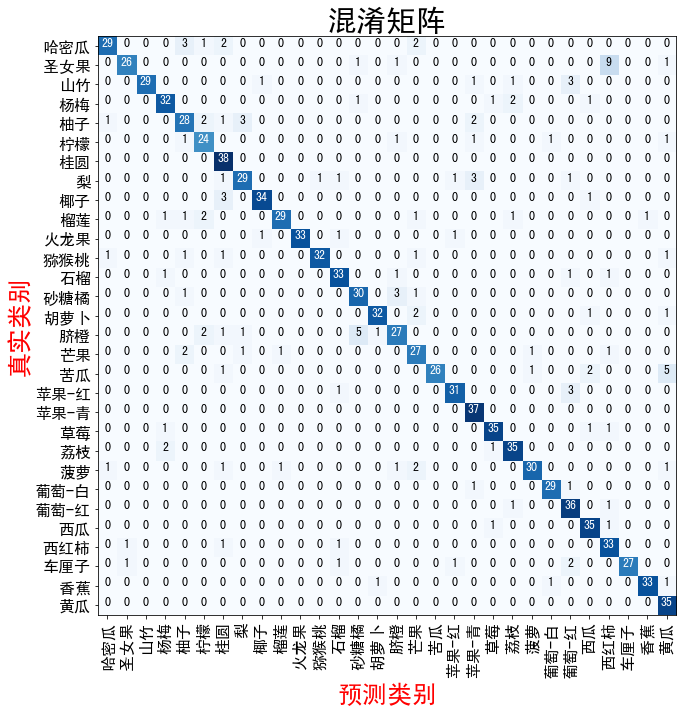

In [10]:
cnf_matrix_plotter(confusion_matrix_model, classes, cmap='Blues')

#### 筛选出测试集中，真实为A类，但被误判为B类的图像

In [17]:
true_A = '哈密瓜'
pred_B = '柚子'

In [18]:
wrong_df = df[(df['标注类别名称']==true_A)&(df['top-1-预测名称']==pred_B)]

In [19]:
wrong_df

图像路径  标注类别ID 标注类别名称  top-1-预测ID top-1-预测名称  \
0   fruit30_split/val/哈密瓜/106.jpg       0    哈密瓜         4.0         柚子   
4   fruit30_split/val/哈密瓜/118.png       0    哈密瓜         4.0         柚子   
19  fruit30_split/val/哈密瓜/178.jpg       0    哈密瓜         4.0         柚子   

    top-2-预测ID top-2-预测名称  top-3-预测ID top-3-预测名称  top-n预测正确  ...  \
0          5.0         柠檬         7.0          梨        0.0  ...   
4         11.0        猕猴桃        23.0       葡萄-白        0.0  ...   
19        16.0         芒果         5.0         柠檬        0.0  ...   

        草莓-预测置信度  荔枝-预测置信度  菠萝-预测置信度  葡萄-白-预测置信度  葡萄-红-预测置信度  西瓜-预测置信度  \
0   1.811183e-07  0.000001  0.000003    0.000010    0.000006  0.000111   
4   7.718361e-04  0.000075  0.000089    0.091842    0.000658  0.000461   
19  9.272546e-09  0.000016  0.000262    0.000008    0.000007  0.000051   

    西红柿-预测置信度     车厘子-预测置信度  香蕉-预测置信度      黄瓜-预测置信度  
0    0.000130  3.998239e-07  0.000004  5.827010e-07  
4    0.003793  3.086089e-08  0.000306  5.165766e-04  
19   0.000124  2.366530e-07  0.000111  1.078545e-06  

[3 rows x 40 columns]

#### 可视化上表中所有被误判的图像

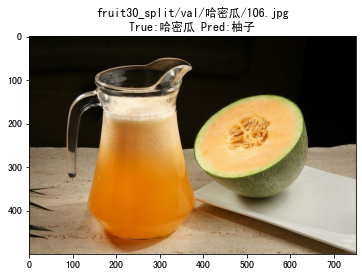

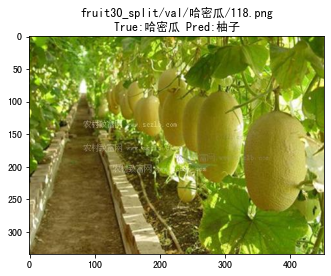

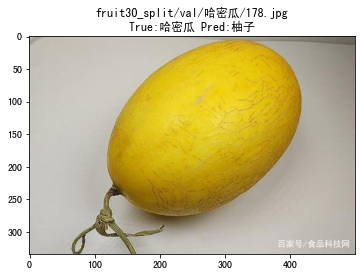

In [20]:
for idx, row in wrong_df.iterrows():
    img_path = row['图像路径']
    img_bgr = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    title_str = img_path + '\nTrue:' + row['标注类别名称'] + ' Pred:' + row['top-1-预测名称']
    plt.title(title_str)
    plt.show()

### PR曲线


#### 绘制某一类别的PR曲线

In [21]:
specific_class = '哈密瓜'

In [22]:
# 二分类标注
y_test = (df['标注类别名称'] == specific_class)

In [23]:
# 二分类预测置信度
y_score = df['哈密瓜-预测置信度']

In [24]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
precision, recall, thresholds = precision_recall_curve(y_test, y_score)
AP = average_precision_score(y_test, y_score, average='weighted')

In [25]:
AP

0.9250054861304703

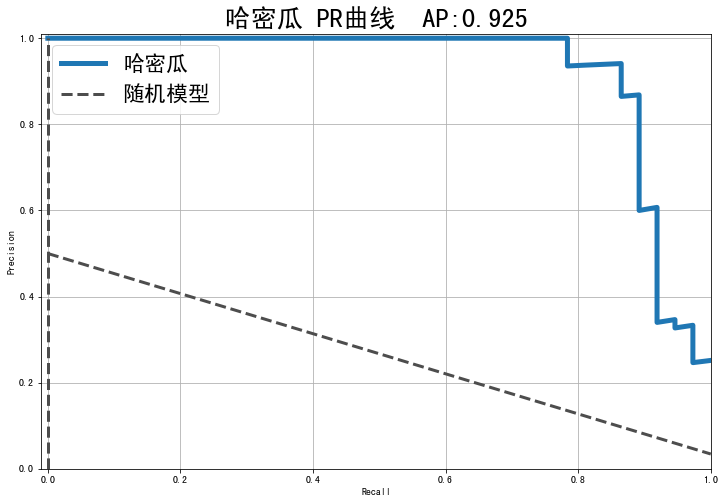

In [26]:
plt.figure(figsize=(12, 8))
# 绘制 PR 曲线
plt.plot(recall, precision, linewidth=5, label=specific_class)

# 随机二分类模型
# 阈值小，所有样本都被预测为正类，recall为1，precision为正样本百分比
# 阈值大，所有样本都被预测为负类，recall为0，precision波动较大
plt.plot([0, 0], [0, 1], ls="--", c='.3', linewidth=3, label='随机模型')
plt.plot([0, 1], [0.5, sum(y_test==1)/len(df)], ls="--", c='.3', linewidth=3)

plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.rcParams['font.size'] = 22
plt.title('{} PR曲线  AP:{:.3f}'.format(specific_class, AP))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)
plt.savefig('{}-PR曲线.pdf'.format(specific_class), dpi=120, bbox_inches='tight')
plt.show()

#### 绘制所有类别的ROC曲线

In [27]:
from matplotlib import colors as mcolors
import random
random.seed(124)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'black', 'indianred', 'brown', 'firebrick', 'maroon', 'darkred', 'red', 'sienna', 'chocolate', 'yellow', 'olivedrab', 'yellowgreen', 'darkolivegreen', 'forestgreen', 'limegreen', 'darkgreen', 'green', 'lime', 'seagreen', 'mediumseagreen', 'darkslategray', 'darkslategrey', 'teal', 'darkcyan', 'dodgerblue', 'navy', 'darkblue', 'mediumblue', 'blue', 'slateblue', 'darkslateblue', 'mediumslateblue', 'mediumpurple', 'rebeccapurple', 'blueviolet', 'indigo', 'darkorchid', 'darkviolet', 'mediumorchid', 'purple', 'darkmagenta', 'fuchsia', 'magenta', 'orchid', 'mediumvioletred', 'deeppink', 'hotpink']
markers = [".",",","o","v","^","<",">","1","2","3","4","8","s","p","P","*","h","H","+","x","X","D","d","|","_",0,1,2,3,4,5,6,7,8,9,10,11]
linestyle = ['--', '-.', '-']

In [28]:
def get_line_arg():
    '''
    随机产生一种绘图线型
    '''
    line_arg = {}
    line_arg['color'] = random.choice(colors)
    # line_arg['marker'] = random.choice(markers)
    line_arg['linestyle'] = random.choice(linestyle)
    line_arg['linewidth'] = random.randint(1, 4)
    # line_arg['markersize'] = random.randint(3, 5)
    return line_arg

In [29]:
get_line_arg()

{'color': 'seagreen', 'linestyle': '-', 'linewidth': 1}

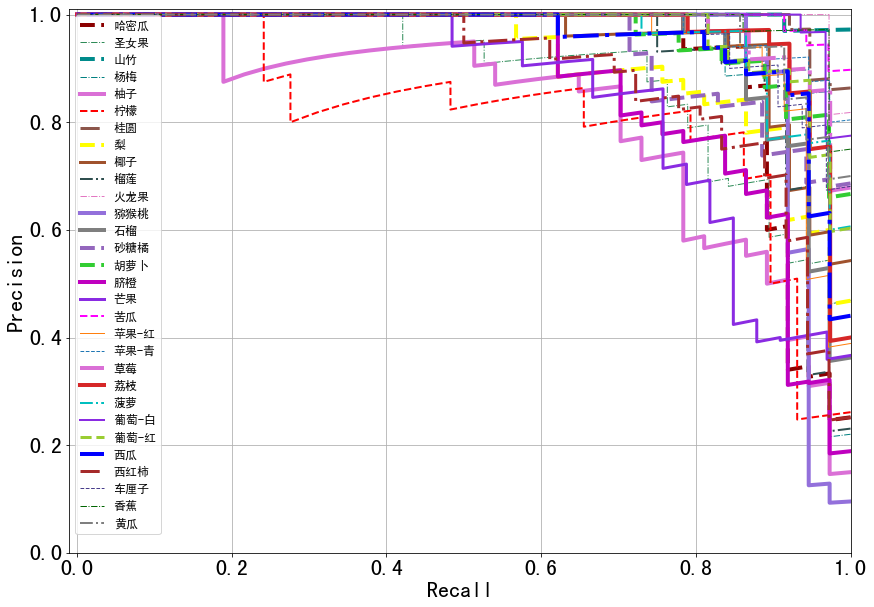

In [30]:
plt.figure(figsize=(14, 10))
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
# plt.plot([0, 1], [0, 1],ls="--", c='.3', linewidth=3, label='随机模型')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.rcParams['font.size'] = 22
plt.grid(True)

ap_list = []
for each_class in classes:
    y_test = list((df['标注类别名称'] == each_class))
    y_score = list(df['{}-预测置信度'.format(each_class)])
    precision, recall, thresholds = precision_recall_curve(y_test, y_score)
    AP = average_precision_score(y_test, y_score, average='weighted')
    plt.plot(recall, precision, **get_line_arg(), label=each_class)
    plt.legend()
    ap_list.append(AP)

plt.legend(loc='best', fontsize=12)
plt.savefig('各类别PR曲线.pdf'.format(specific_class), dpi=120, bbox_inches='tight')
plt.show()

#### 将AP增加至`各类别准确率评估指标`表格中

In [31]:
df_report = pd.read_csv('各类别准确率评估指标.csv')

In [32]:
df_report

类别  precision    recall  f1-score  support  accuracy
0            哈密瓜   0.906250  0.783784  0.840580     37.0  0.783784
1            圣女果   0.928571  0.684211  0.787879     38.0  0.684211
2             山竹   1.000000  0.828571  0.906250     35.0  0.828571
3             杨梅   0.864865  0.864865  0.864865     37.0  0.864865
4             柚子   0.756757  0.756757  0.756757     37.0  0.756757
5             柠檬   0.774194  0.827586  0.800000     29.0  0.827586
6             桂圆   0.760000  1.000000  0.863636     38.0  1.000000
7              梨   0.852941  0.783784  0.816901     37.0  0.783784
8             椰子   0.944444  0.894737  0.918919     38.0  0.894737
9             榴莲   0.935484  0.805556  0.865672     36.0  0.805556
10           火龙果   1.000000  0.916667  0.956522     36.0  0.916667
11           猕猴桃   0.969697  0.864865  0.914286     37.0  0.864865
12            石榴   0.868421  0.891892  0.880000     37.0  0.891892
13           砂糖橘   0.810811  0.857143  0.833333     35.0  0.857143
14           胡萝卜   0.941176  0.888889  0.914286     36.0  0.888889
15            脐橙   0.794118  0.729730  0.760563     37.0  0.729730
16            芒果   0.750000  0.818182  0.782609     33.0  0.818182
17            苦瓜   1.000000  0.742857  0.852459     35.0  0.742857
18          苹果-红   0.911765  0.885714  0.898551     35.0  0.885714
19          苹果-青   0.822222  1.000000  0.902439     37.0  1.000000
20            草莓   0.921053  0.921053  0.921053     38.0  0.921053
21            荔枝   0.875000  0.921053  0.897436     38.0  0.921053
22            菠萝   0.937500  0.810811  0.869565     37.0  0.810811
23          葡萄-白   0.935484  0.935484  0.935484     31.0  0.935484
24          葡萄-红   0.765957  0.947368  0.847059     38.0  0.947368
25            西瓜   0.853659  0.945946  0.897436     37.0  0.945946
26           西红柿   0.702128  0.916667  0.795181     36.0  0.916667
27           车厘子   1.000000  0.843750  0.915254     32.0  0.843750
28            香蕉   0.970588  0.916667  0.942857     36.0  0.916667
29            黄瓜   0.760870  1.000000  0.864198     35.0  1.000000
30     macro avg   0.877132  0.866153  0.866734   1078.0  0.866153
31  weighted avg   0.877077  0.866419  0.866797   1078.0  0.866419

In [33]:
# 计算 AUC值 的 宏平均 和 加权平均
macro_avg_auc = np.mean(ap_list)
weighted_avg_auc = sum(ap_list * df_report.iloc[:-2]['support'] / len(df))

In [34]:
ap_list.append(macro_avg_auc)
ap_list.append(weighted_avg_auc)

In [35]:
df_report['AP'] = ap_list

In [36]:
df_report

类别  precision    recall  f1-score  support  accuracy        AP
0            哈密瓜   0.906250  0.783784  0.840580     37.0  0.783784  0.925005
1            圣女果   0.928571  0.684211  0.787879     38.0  0.684211  0.892679
2             山竹   1.000000  0.828571  0.906250     35.0  0.828571  0.997550
3             杨梅   0.864865  0.864865  0.864865     37.0  0.864865  0.961013
4             柚子   0.756757  0.756757  0.756757     37.0  0.756757  0.816679
5             柠檬   0.774194  0.827586  0.800000     29.0  0.827586  0.819273
6             桂圆   0.760000  1.000000  0.863636     38.0  1.000000  0.992567
7              梨   0.852941  0.783784  0.816901     37.0  0.783784  0.921136
8             椰子   0.944444  0.894737  0.918919     38.0  0.894737  0.953389
9             榴莲   0.935484  0.805556  0.865672     36.0  0.805556  0.937447
10           火龙果   1.000000  0.916667  0.956522     36.0  0.916667  0.994949
11           猕猴桃   0.969697  0.864865  0.914286     37.0  0.864865  0.935131
12            石榴   0.868421  0.891892  0.880000     37.0  0.891892  0.949262
13           砂糖橘   0.810811  0.857143  0.833333     35.0  0.857143  0.943407
14           胡萝卜   0.941176  0.888889  0.914286     36.0  0.888889  0.966317
15            脐橙   0.794118  0.729730  0.760563     37.0  0.729730  0.877489
16            芒果   0.750000  0.818182  0.782609     33.0  0.818182  0.854921
17            苦瓜   1.000000  0.742857  0.852459     35.0  0.742857  0.994642
18          苹果-红   0.911765  0.885714  0.898551     35.0  0.885714  0.954901
19          苹果-青   0.822222  1.000000  0.902439     37.0  1.000000  0.982240
20            草莓   0.921053  0.921053  0.921053     38.0  0.921053  0.979455
21            荔枝   0.875000  0.921053  0.897436     38.0  0.921053  0.969438
22            菠萝   0.937500  0.810811  0.869565     37.0  0.810811  0.963602
23          葡萄-白   0.935484  0.935484  0.935484     31.0  0.935484  0.991701
24          葡萄-红   0.765957  0.947368  0.847059     38.0  0.947368  0.970296
25            西瓜   0.853659  0.945946  0.897436     37.0  0.945946  0.954452
26           西红柿   0.702128  0.916667  0.795181     36.0  0.916667  0.895696
27           车厘子   1.000000  0.843750  0.915254     32.0  0.843750  0.971338
28            香蕉   0.970588  0.916667  0.942857     36.0  0.916667  0.989832
29            黄瓜   0.760870  1.000000  0.864198     35.0  1.000000  0.977127
30     macro avg   0.877132  0.866153  0.866734   1078.0  0.866153  0.944431
31  weighted avg   0.877077  0.866419  0.866797   1078.0  0.866419  0.945061

In [37]:
df_report.to_csv('各类别准确率评估指标.csv', index=False)

### ROC曲线

#### 绘制某一类别的ROC曲线

In [38]:
specific_class = '哈密瓜'

In [39]:
# 二分类标注
y_test = (df['标注类别名称'] == specific_class)

In [40]:
y_test

0        True
1        True
2        True
3        True
4        True
        ...  
1073    False
1074    False
1075    False
1076    False
1077    False
Name: 标注类别名称, Length: 1078, dtype: bool

In [41]:
# 二分类置信度
y_score = df['哈密瓜-预测置信度']

In [42]:
y_score

0       2.175794e-03
1       3.592420e-01
2       5.169101e-01
3       7.233925e-01
4       5.403401e-03
            ...     
1073    4.988705e-06
1074    1.151992e-07
1075    9.231192e-04
1076    1.071914e-06
1077    1.868893e-07
Name: 哈密瓜-预测置信度, Length: 1078, dtype: float64

In [43]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(y_test, y_score)

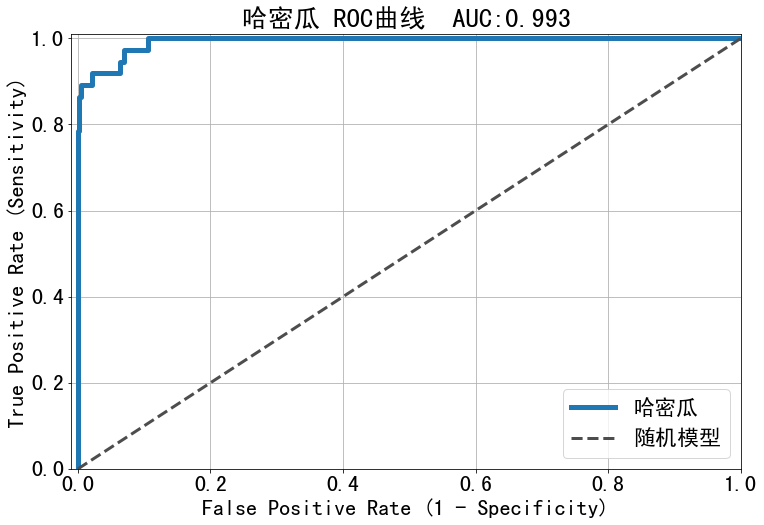

In [44]:
plt.figure(figsize=(12, 8))
plt.plot(fpr, tpr, linewidth=5, label=specific_class)
plt.plot([0, 1], [0, 1],ls="--", c='.3', linewidth=3, label='随机模型')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.rcParams['font.size'] = 22
plt.title('{} ROC曲线  AUC:{:.3f}'.format(specific_class, auc(fpr, tpr)))
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend()
plt.grid(True)

plt.savefig('{}-ROC曲线.pdf'.format(specific_class), dpi=120, bbox_inches='tight')
plt.show()

# yticks = ax.yaxis.get_major_ticks()
# yticks[0].label1.set_visible(False)

In [45]:
auc(fpr, tpr)

0.9927045200820417

#### 绘制所有类别的ROC曲线

In [46]:
from matplotlib import colors as mcolors
import random
random.seed(124)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'black', 'indianred', 'brown', 'firebrick', 'maroon', 'darkred', 'red', 'sienna', 'chocolate', 'yellow', 'olivedrab', 'yellowgreen', 'darkolivegreen', 'forestgreen', 'limegreen', 'darkgreen', 'green', 'lime', 'seagreen', 'mediumseagreen', 'darkslategray', 'darkslategrey', 'teal', 'darkcyan', 'dodgerblue', 'navy', 'darkblue', 'mediumblue', 'blue', 'slateblue', 'darkslateblue', 'mediumslateblue', 'mediumpurple', 'rebeccapurple', 'blueviolet', 'indigo', 'darkorchid', 'darkviolet', 'mediumorchid', 'purple', 'darkmagenta', 'fuchsia', 'magenta', 'orchid', 'mediumvioletred', 'deeppink', 'hotpink']
markers = [".",",","o","v","^","<",">","1","2","3","4","8","s","p","P","*","h","H","+","x","X","D","d","|","_",0,1,2,3,4,5,6,7,8,9,10,11]
linestyle = ['--', '-.', '-']

In [47]:
def get_line_arg():
    '''
    随机产生一种绘图线型
    '''
    line_arg = {}
    line_arg['color'] = random.choice(colors)
    # line_arg['marker'] = random.choice(markers)
    line_arg['linestyle'] = random.choice(linestyle)
    line_arg['linewidth'] = random.randint(1, 4)
    # line_arg['markersize'] = random.randint(3, 5)
    return line_arg

In [48]:
get_line_arg()

{'color': 'seagreen', 'linestyle': '-', 'linewidth': 1}

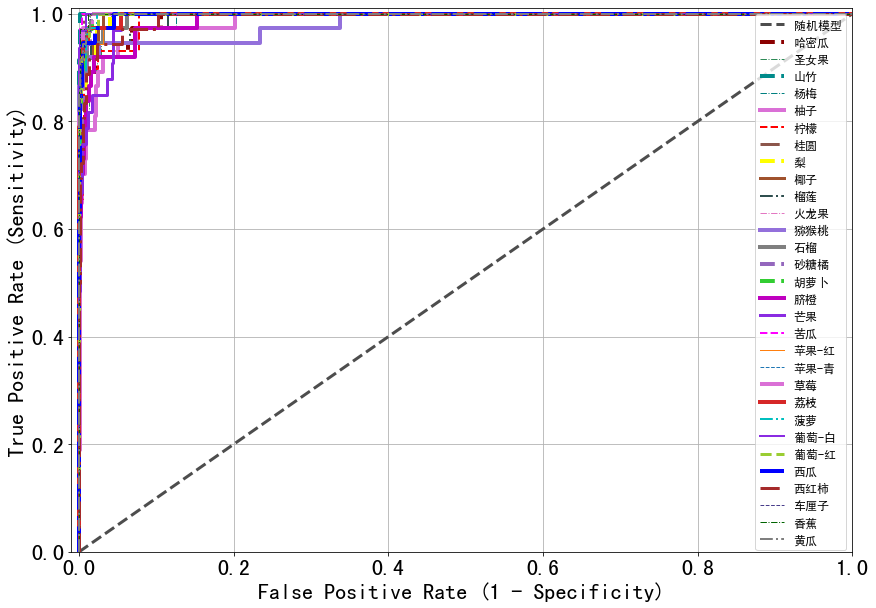

In [49]:
plt.figure(figsize=(14, 10))
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.plot([0, 1], [0, 1],ls="--", c='.3', linewidth=3, label='随机模型')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.rcParams['font.size'] = 22
plt.grid(True)

auc_list = []
for each_class in classes:
    y_test = list((df['标注类别名称'] == each_class))
    y_score = list(df['{}-预测置信度'.format(each_class)])
    fpr, tpr, threshold = roc_curve(y_test, y_score)
    plt.plot(fpr, tpr, **get_line_arg(), label=each_class)
    plt.legend()
    auc_list.append(auc(fpr, tpr))

plt.legend(loc='best', fontsize=12)
plt.savefig('各类别ROC曲线.pdf'.format(specific_class), dpi=120, bbox_inches='tight')
plt.show()

#### 将AUC增加至`各类别准确率评估指标`表格中

In [50]:
df_report = pd.read_csv('各类别准确率评估指标.csv')

In [51]:
df_report

类别  precision    recall  f1-score  support  accuracy        AP
0            哈密瓜   0.906250  0.783784  0.840580     37.0  0.783784  0.925005
1            圣女果   0.928571  0.684211  0.787879     38.0  0.684211  0.892679
2             山竹   1.000000  0.828571  0.906250     35.0  0.828571  0.997550
3             杨梅   0.864865  0.864865  0.864865     37.0  0.864865  0.961013
4             柚子   0.756757  0.756757  0.756757     37.0  0.756757  0.816679
5             柠檬   0.774194  0.827586  0.800000     29.0  0.827586  0.819273
6             桂圆   0.760000  1.000000  0.863636     38.0  1.000000  0.992567
7              梨   0.852941  0.783784  0.816901     37.0  0.783784  0.921136
8             椰子   0.944444  0.894737  0.918919     38.0  0.894737  0.953389
9             榴莲   0.935484  0.805556  0.865672     36.0  0.805556  0.937447
10           火龙果   1.000000  0.916667  0.956522     36.0  0.916667  0.994949
11           猕猴桃   0.969697  0.864865  0.914286     37.0  0.864865  0.935131
12            石榴   0.868421  0.891892  0.880000     37.0  0.891892  0.949262
13           砂糖橘   0.810811  0.857143  0.833333     35.0  0.857143  0.943407
14           胡萝卜   0.941176  0.888889  0.914286     36.0  0.888889  0.966317
15            脐橙   0.794118  0.729730  0.760563     37.0  0.729730  0.877489
16            芒果   0.750000  0.818182  0.782609     33.0  0.818182  0.854921
17            苦瓜   1.000000  0.742857  0.852459     35.0  0.742857  0.994642
18          苹果-红   0.911765  0.885714  0.898551     35.0  0.885714  0.954901
19          苹果-青   0.822222  1.000000  0.902439     37.0  1.000000  0.982240
20            草莓   0.921053  0.921053  0.921053     38.0  0.921053  0.979455
21            荔枝   0.875000  0.921053  0.897436     38.0  0.921053  0.969438
22            菠萝   0.937500  0.810811  0.869565     37.0  0.810811  0.963602
23          葡萄-白   0.935484  0.935484  0.935484     31.0  0.935484  0.991701
24          葡萄-红   0.765957  0.947368  0.847059     38.0  0.947368  0.970296
25            西瓜   0.853659  0.945946  0.897436     37.0  0.945946  0.954452
26           西红柿   0.702128  0.916667  0.795181     36.0  0.916667  0.895696
27           车厘子   1.000000  0.843750  0.915254     32.0  0.843750  0.971338
28            香蕉   0.970588  0.916667  0.942857     36.0  0.916667  0.989832
29            黄瓜   0.760870  1.000000  0.864198     35.0  1.000000  0.977127
30     macro avg   0.877132  0.866153  0.866734   1078.0  0.866153  0.944431
31  weighted avg   0.877077  0.866419  0.866797   1078.0  0.866419  0.945061

In [52]:
# 计算 AUC值 的 宏平均 和 加权平均
macro_avg_auc = np.mean(auc_list)
weighted_avg_auc = sum(auc_list * df_report.iloc[:-2]['support'] / len(df))

In [53]:
auc_list.append(macro_avg_auc)
auc_list.append(weighted_avg_auc)

In [54]:
df_report['AUC'] = auc_list

In [55]:
df_report

类别  precision    recall  f1-score  support  accuracy        AP  \
0            哈密瓜   0.906250  0.783784  0.840580     37.0  0.783784  0.925005   
1            圣女果   0.928571  0.684211  0.787879     38.0  0.684211  0.892679   
2             山竹   1.000000  0.828571  0.906250     35.0  0.828571  0.997550   
3             杨梅   0.864865  0.864865  0.864865     37.0  0.864865  0.961013   
4             柚子   0.756757  0.756757  0.756757     37.0  0.756757  0.816679   
5             柠檬   0.774194  0.827586  0.800000     29.0  0.827586  0.819273   
6             桂圆   0.760000  1.000000  0.863636     38.0  1.000000  0.992567   
7              梨   0.852941  0.783784  0.816901     37.0  0.783784  0.921136   
8             椰子   0.944444  0.894737  0.918919     38.0  0.894737  0.953389   
9             榴莲   0.935484  0.805556  0.865672     36.0  0.805556  0.937447   
10           火龙果   1.000000  0.916667  0.956522     36.0  0.916667  0.994949   
11           猕猴桃   0.969697  0.864865  0.914286     37.0  0.864865  0.935131   
12            石榴   0.868421  0.891892  0.880000     37.0  0.891892  0.949262   
13           砂糖橘   0.810811  0.857143  0.833333     35.0  0.857143  0.943407   
14           胡萝卜   0.941176  0.888889  0.914286     36.0  0.888889  0.966317   
15            脐橙   0.794118  0.729730  0.760563     37.0  0.729730  0.877489   
16            芒果   0.750000  0.818182  0.782609     33.0  0.818182  0.854921   
17            苦瓜   1.000000  0.742857  0.852459     35.0  0.742857  0.994642   
18          苹果-红   0.911765  0.885714  0.898551     35.0  0.885714  0.954901   
19          苹果-青   0.822222  1.000000  0.902439     37.0  1.000000  0.982240   
20            草莓   0.921053  0.921053  0.921053     38.0  0.921053  0.979455   
21            荔枝   0.875000  0.921053  0.897436     38.0  0.921053  0.969438   
22            菠萝   0.937500  0.810811  0.869565     37.0  0.810811  0.963602   
23          葡萄-白   0.935484  0.935484  0.935484     31.0  0.935484  0.991701   
24          葡萄-红   0.765957  0.947368  0.847059     38.0  0.947368  0.970296   
25            西瓜   0.853659  0.945946  0.897436     37.0  0.945946  0.954452   
26           西红柿   0.702128  0.916667  0.795181     36.0  0.916667  0.895696   
27           车厘子   1.000000  0.843750  0.915254     32.0  0.843750  0.971338   
28            香蕉   0.970588  0.916667  0.942857     36.0  0.916667  0.989832   
29            黄瓜   0.760870  1.000000  0.864198     35.0  1.000000  0.977127   
30     macro avg   0.877132  0.866153  0.866734   1078.0  0.866153  0.944431   
31  weighted avg   0.877077  0.866419  0.866797   1078.0  0.866419  0.945061   

         AUC  
0   0.992705  
1   0.994686  
2   0.999918  
3   0.995950  
4   0.986292  
5   0.991355  
6   0.999696  
7   0.996287  
8   0.997596  
9   0.994082  
10  0.999787  
11  0.983670  
12  0.996651  
13  0.997754  
14  0.998640  
15  0.989433  
16  0.991533  
17  0.999808  
18  0.997151  
19  0.999325  
20  0.999089  
21  0.997950  
22  0.998338  
23  0.999692  
24  0.998583  
25  0.997560  
26  0.993096  
27  0.998924  
28  0.999573  
29  0.999041  
30  0.996139  
31  0.996140

In [56]:
df_report.to_csv('各类别准确率评估指标.csv', index=False)

### 绘制各类别准确率评估指标柱状图

#### 导入各类别准确率评估指标表格

In [58]:
df = pd.read_csv('各类别准确率评估指标.csv')

In [59]:
df

类别  precision    recall  f1-score  support  accuracy        AP  \
0            哈密瓜   0.906250  0.783784  0.840580     37.0  0.783784  0.925005   
1            圣女果   0.928571  0.684211  0.787879     38.0  0.684211  0.892679   
2             山竹   1.000000  0.828571  0.906250     35.0  0.828571  0.997550   
3             杨梅   0.864865  0.864865  0.864865     37.0  0.864865  0.961013   
4             柚子   0.756757  0.756757  0.756757     37.0  0.756757  0.816679   
5             柠檬   0.774194  0.827586  0.800000     29.0  0.827586  0.819273   
6             桂圆   0.760000  1.000000  0.863636     38.0  1.000000  0.992567   
7              梨   0.852941  0.783784  0.816901     37.0  0.783784  0.921136   
8             椰子   0.944444  0.894737  0.918919     38.0  0.894737  0.953389   
9             榴莲   0.935484  0.805556  0.865672     36.0  0.805556  0.937447   
10           火龙果   1.000000  0.916667  0.956522     36.0  0.916667  0.994949   
11           猕猴桃   0.969697  0.864865  0.914286     37.0  0.864865  0.935131   
12            石榴   0.868421  0.891892  0.880000     37.0  0.891892  0.949262   
13           砂糖橘   0.810811  0.857143  0.833333     35.0  0.857143  0.943407   
14           胡萝卜   0.941176  0.888889  0.914286     36.0  0.888889  0.966317   
15            脐橙   0.794118  0.729730  0.760563     37.0  0.729730  0.877489   
16            芒果   0.750000  0.818182  0.782609     33.0  0.818182  0.854921   
17            苦瓜   1.000000  0.742857  0.852459     35.0  0.742857  0.994642   
18          苹果-红   0.911765  0.885714  0.898551     35.0  0.885714  0.954901   
19          苹果-青   0.822222  1.000000  0.902439     37.0  1.000000  0.982240   
20            草莓   0.921053  0.921053  0.921053     38.0  0.921053  0.979455   
21            荔枝   0.875000  0.921053  0.897436     38.0  0.921053  0.969438   
22            菠萝   0.937500  0.810811  0.869565     37.0  0.810811  0.963602   
23          葡萄-白   0.935484  0.935484  0.935484     31.0  0.935484  0.991701   
24          葡萄-红   0.765957  0.947368  0.847059     38.0  0.947368  0.970296   
25            西瓜   0.853659  0.945946  0.897436     37.0  0.945946  0.954452   
26           西红柿   0.702128  0.916667  0.795181     36.0  0.916667  0.895696   
27           车厘子   1.000000  0.843750  0.915254     32.0  0.843750  0.971338   
28            香蕉   0.970588  0.916667  0.942857     36.0  0.916667  0.989832   
29            黄瓜   0.760870  1.000000  0.864198     35.0  1.000000  0.977127   
30     macro avg   0.877132  0.866153  0.866734   1078.0  0.866153  0.944431   
31  weighted avg   0.877077  0.866419  0.866797   1078.0  0.866419  0.945061   

         AUC  
0   0.992705  
1   0.994686  
2   0.999918  
3   0.995950  
4   0.986292  
5   0.991355  
6   0.999696  
7   0.996287  
8   0.997596  
9   0.994082  
10  0.999787  
11  0.983670  
12  0.996651  
13  0.997754  
14  0.998640  
15  0.989433  
16  0.991533  
17  0.999808  
18  0.997151  
19  0.999325  
20  0.999089  
21  0.997950  
22  0.998338  
23  0.999692  
24  0.998583  
25  0.997560  
26  0.993096  
27  0.998924  
28  0.999573  
29  0.999041  
30  0.996139  
31  0.996140

#### 选择评估指标

In [60]:
# feature = 'precision'
# feature = 'recall'
# feature = 'f1-score'
feature = 'accuracy'
# feature = 'AP'
# feature = 'AUC'

#### 绘制柱状图

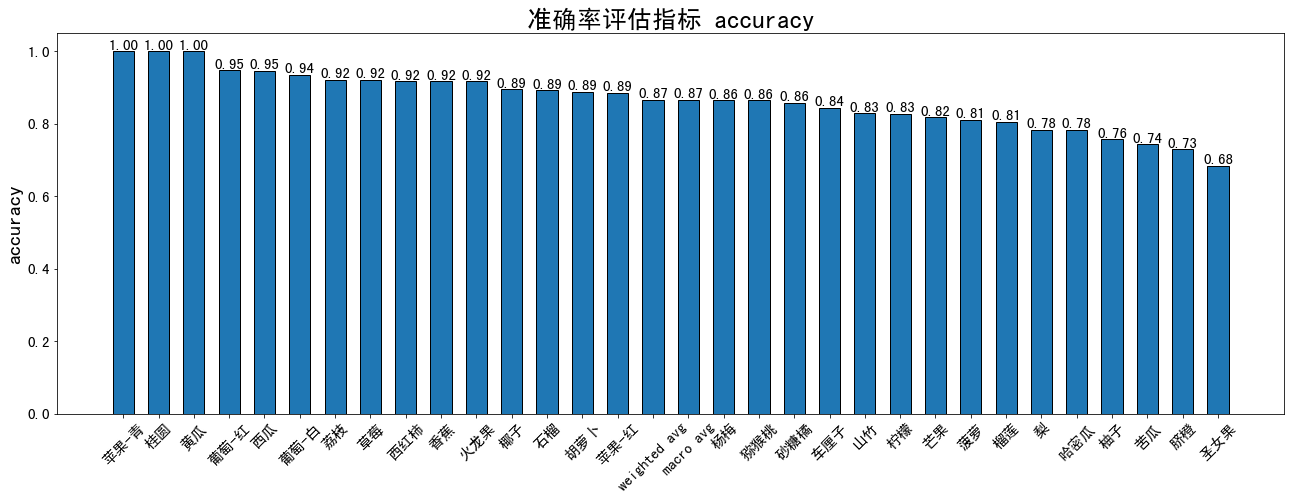

In [61]:
df_plot = df.sort_values(by=feature, ascending=False)

plt.figure(figsize=(22, 7))

x = df_plot['类别']
y = df_plot[feature]

ax = plt.bar(x, y, width=0.6, facecolor='#1f77b4', edgecolor='k')
plt.bar_label(ax, fmt='%.2f', fontsize=15) # 置信度数值

plt.xticks(rotation=45)
plt.tick_params(labelsize=15)
# plt.xlabel('类别', fontsize=20)
plt.ylabel(feature, fontsize=20)
plt.title('准确率评估指标 {}'.format(feature), fontsize=25)

plt.savefig('各类别准确率评估指标柱状图-{}.pdf'.format(feature), dpi=120, bbox_inches='tight')

plt.show()

### 计算测试集图像语义特征

#### 抽取模型中间层输出结果作为语义特征

In [62]:
from torchvision.models.feature_extraction import create_feature_extractor

In [67]:
model_trunc = create_feature_extractor(model, return_nodes={'avgpool': 'semantic_feature'})

#### 计算单张图像的语义特征

In [70]:
img_path = 'fruit30_split/val/菠萝/105.jpg'
img_pil = Image.open(img_path)
input_img = test_transform(img_pil) # 预处理
input_img = input_img.unsqueeze(0).to(device)
# 执行前向预测，得到指定中间层的输出
pred_logits = model_trunc(input_img) 

In [71]:
pred_logits['semantic_feature'].squeeze().detach().cpu().numpy().shape

(512,)

#### 载入测试集图像分类结果

In [72]:
df = pd.read_csv('测试集预测结果.csv')

In [74]:
df.head()

图像路径  标注类别ID 标注类别名称  top-1-预测ID top-1-预测名称  \
0  fruit30_split/val/哈密瓜/106.jpg       0    哈密瓜         4.0         柚子   
1  fruit30_split/val/哈密瓜/109.jpg       0    哈密瓜         6.0         桂圆   
2  fruit30_split/val/哈密瓜/114.jpg       0    哈密瓜         0.0        哈密瓜   
3  fruit30_split/val/哈密瓜/116.jpg       0    哈密瓜         0.0        哈密瓜   
4  fruit30_split/val/哈密瓜/118.png       0    哈密瓜         4.0         柚子   

   top-2-预测ID top-2-预测名称  top-3-预测ID top-3-预测名称  top-n预测正确  ...      草莓-预测置信度  \
0         5.0         柠檬         7.0          梨        0.0  ...  1.811183e-07   
1         0.0        哈密瓜         8.0         椰子        1.0  ...  8.418790e-08   
2        26.0        西红柿        23.0       葡萄-白        1.0  ...  9.838557e-03   
3        16.0         芒果         4.0         柚子        1.0  ...  4.420542e-05   
4        11.0        猕猴桃        23.0       葡萄-白        0.0  ...  7.718361e-04   

   荔枝-预测置信度  菠萝-预测置信度  葡萄-白-预测置信度  葡萄-红-预测置信度  西瓜-预测置信度     西红柿-预测置信度  \
0  0.000001  0.000003    0.000010    0.000006  0.000111  1.297347e-04   
1  0.000001  0.000001    0.001480    0.000045  0.000174  7.697441e-07   
2  0.007701  0.001152    0.040279    0.035283  0.001550  2.761993e-01   
3  0.000247  0.000071    0.001454    0.000003  0.000461  8.368953e-04   
4  0.000075  0.000089    0.091842    0.000658  0.000461  3.792721e-03   

      车厘子-预测置信度  香蕉-预测置信度      黄瓜-预测置信度  
0  3.998239e-07  0.000004  5.827010e-07  
1  3.153866e-06  0.000033  2.554850e-06  
2  1.698841e-04  0.006099  1.220758e-03  
3  2.175214e-07  0.022096  4.124223e-04  
4  3.086089e-08  0.000306  5.165766e-04  

[5 rows x 40 columns]

#### 计算测试集每张图像的语义特征

In [75]:
encoding_array = []
img_path_list = []

for img_path in tqdm(df['图像路径']):
    img_path_list.append(img_path)
    img_pil = Image.open(img_path).convert('RGB')
    input_img = test_transform(img_pil).unsqueeze(0).to(device) # 预处理
    feature = model_trunc(input_img)['semantic_feature'].squeeze().detach().cpu().numpy() # 执行前向预测，得到 avgpool 层输出的语义特征
    encoding_array.append(feature)
encoding_array = np.array(encoding_array)

100%|██████████| 1078/1078 [00:14<00:00, 73.49it/s]


In [76]:
encoding_array.shape

(1078, 512)

#### 保存为本地的.npy文件

In [77]:
# 保存为本地的 npy 文件
np.save('测试集语义特征.npy', encoding_array)

### 测试集语义特征t-SNE降维可视化

#### 可视化配置

In [79]:
import seaborn as sns
marker_list = ['.', ',', 'o', 'v', '^', '<', '>', '1', '2', '3', '4', '8', 's', 'p', 'P', '*', 'h', 'H', '+', 'x', 'X', 'D', 'd', '|', '_', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [80]:
class_list = np.unique(df['标注类别名称'])

In [81]:
class_list

array(['哈密瓜', '圣女果', '山竹', '杨梅', '柚子', '柠檬', '桂圆', '梨', '椰子', '榴莲', '火龙果',
       '猕猴桃', '石榴', '砂糖橘', '胡萝卜', '脐橙', '芒果', '苦瓜', '苹果-红', '苹果-青', '草莓',
       '荔枝', '菠萝', '葡萄-白', '葡萄-红', '西瓜', '西红柿', '车厘子', '香蕉', '黄瓜'],
      dtype=object)

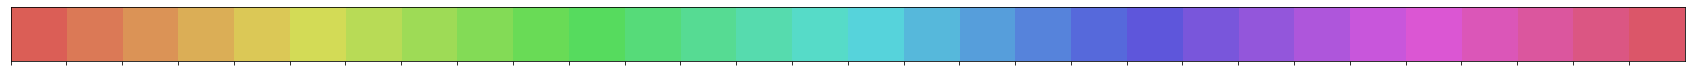

In [82]:
n_class = len(class_list) # 测试集标签类别数
palette = sns.hls_palette(n_class) # 配色方案
sns.palplot(palette)

In [83]:
# 随机打乱颜色列表和点型列表
import random
random.seed(1234)
random.shuffle(marker_list)
random.shuffle(palette)

#### t-SNE降维至二维

In [84]:
# 降维到二维和三维
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, n_iter=20000)
X_tsne_2d = tsne.fit_transform(encoding_array)

/environment/miniconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/environment/miniconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [85]:
X_tsne_2d.shape

(1078, 2)

#### 可视化展示

In [86]:
# 不同的 符号 表示 不同的 标注类别
show_feature = '标注类别名称'

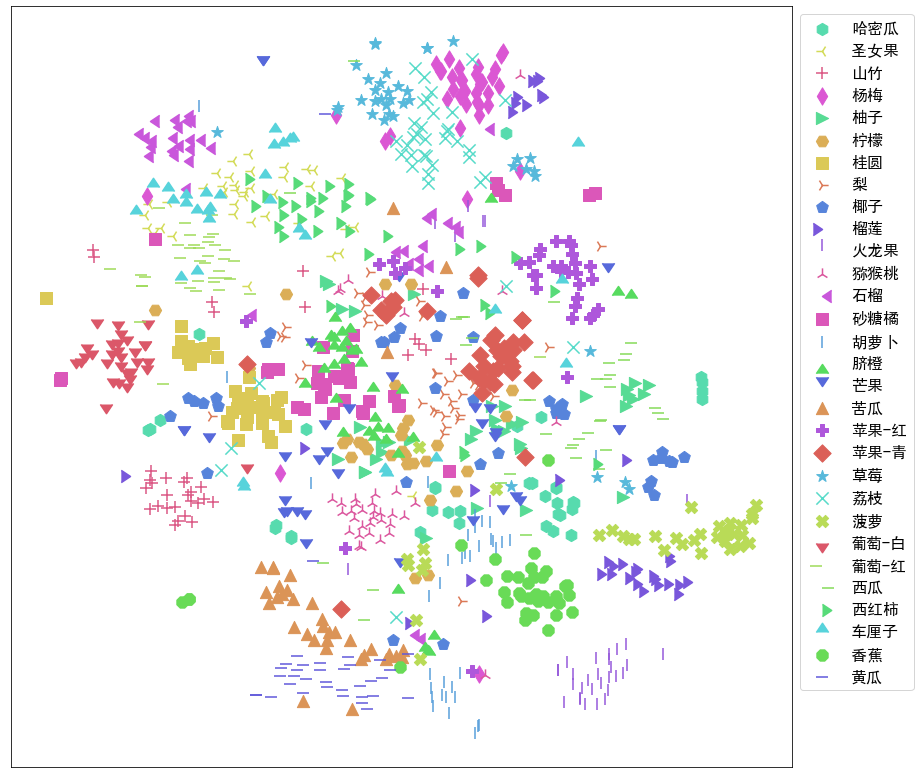

In [87]:
plt.figure(figsize=(14, 14))
for idx, fruit in enumerate(class_list): # 遍历每个类别
    # 获取颜色和点型
    color = palette[idx]
    marker = marker_list[idx%len(marker_list)]

    # 找到所有标注类别为当前类别的图像索引号
    indices = np.where(df[show_feature]==fruit)
    plt.scatter(X_tsne_2d[indices, 0], X_tsne_2d[indices, 1], color=color, marker=marker, label=fruit, s=150)

plt.legend(fontsize=16, markerscale=1, bbox_to_anchor=(1, 1))
plt.xticks([])
plt.yticks([])
plt.savefig('语义特征t-SNE二维降维可视化.pdf', dpi=300) # 保存图像
plt.show()

#### plotply交互式可视化

In [88]:
import plotly.express as px

In [89]:
df_2d = pd.DataFrame()
df_2d['X'] = list(X_tsne_2d[:, 0].squeeze())
df_2d['Y'] = list(X_tsne_2d[:, 1].squeeze())
df_2d['标注类别名称'] = df['标注类别名称']
df_2d['预测类别'] = df['top-1-预测名称']
df_2d['图像路径'] = df['图像路径']
df_2d.to_csv('t-SNE-2D.csv', index=False)

In [90]:
df_2d


X          Y 标注类别名称 预测类别                           图像路径
0     20.291527 -16.288881    哈密瓜   柚子  fruit30_split/val/哈密瓜/106.jpg
1    -30.424877  -4.987771    哈密瓜   桂圆  fruit30_split/val/哈密瓜/109.jpg
2      5.812939 -14.974437    哈密瓜  哈密瓜  fruit30_split/val/哈密瓜/114.jpg
3     23.710501 -22.019131    哈密瓜  哈密瓜  fruit30_split/val/哈密瓜/116.jpg
4    -11.238038  -6.321575    哈密瓜   柚子  fruit30_split/val/哈密瓜/118.png
...         ...        ...    ...  ...                            ...
1073 -15.809403 -45.904804     黄瓜   黄瓜    fruit30_split/val/黄瓜/87.jpg
1074  -8.598919 -43.749821     黄瓜   黄瓜     fruit30_split/val/黄瓜/9.jpg
1075  -5.636846 -39.995018     黄瓜   黄瓜    fruit30_split/val/黄瓜/91.png
1076  -9.379371 -40.972572     黄瓜   黄瓜    fruit30_split/val/黄瓜/94.jpg
1077  -5.451752 -41.159744     黄瓜   黄瓜    fruit30_split/val/黄瓜/97.jpg

[1078 rows x 5 columns]

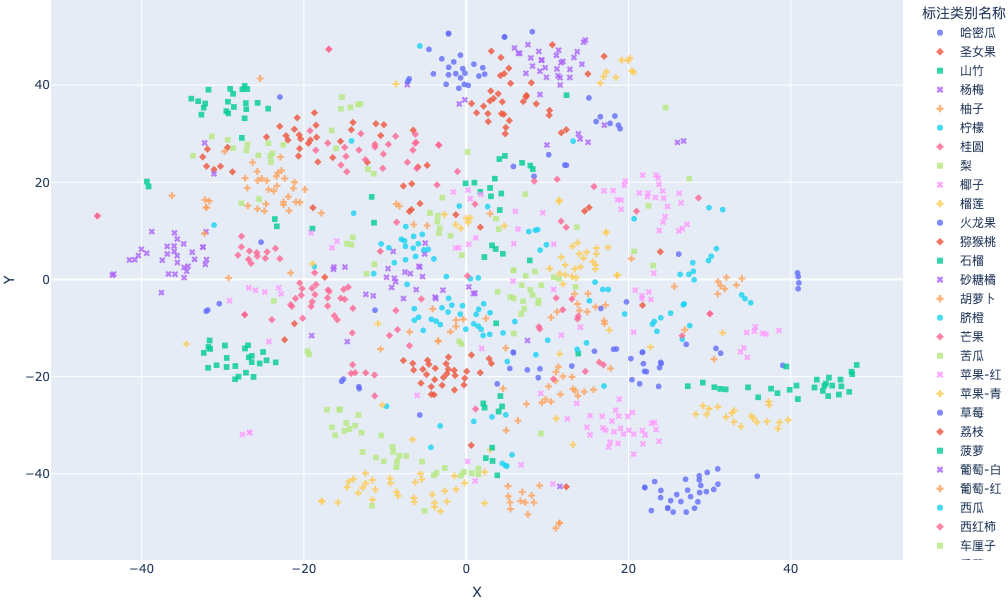

In [91]:
fig = px.scatter(df_2d, 
                 x='X', 
                 y='Y',
                 color=show_feature, 
                 labels=show_feature,
                 symbol=show_feature, 
                 hover_name='图像路径',
                 opacity=0.8,
                 width=1000, 
                 height=600
                )
# 设置排版
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()
fig.write_html('语义特征t-SNE二维降维plotly可视化.html')

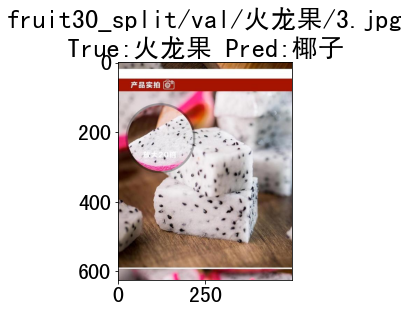

In [92]:
# 查看图像
img_path_temp = 'fruit30_split/val/火龙果/3.jpg'
img_bgr = cv2.imread(img_path_temp)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
temp_df = df[df['图像路径'] == img_path_temp]
title_str = img_path_temp + '\nTrue:' + temp_df['标注类别名称'].item() + ' Pred:' + temp_df['top-1-预测名称'].item()
plt.title(title_str)
plt.show()

#### t-SNE降维至三维，并可视化

In [93]:
# 降维到三维
from sklearn.manifold import TSNE
tsne = TSNE(n_components=3, n_iter=10000)
X_tsne_3d = tsne.fit_transform(encoding_array)

/environment/miniconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/environment/miniconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



In [94]:
X_tsne_3d.shape

(1078, 3)

In [95]:
show_feature = '标注类别名称'
# show_feature = '预测类别'

In [96]:
df_3d = pd.DataFrame()
df_3d['X'] = list(X_tsne_3d[:, 0].squeeze())
df_3d['Y'] = list(X_tsne_3d[:, 1].squeeze())
df_3d['Z'] = list(X_tsne_3d[:, 2].squeeze())
df_3d['标注类别名称'] = df['标注类别名称']
df_3d['预测类别'] = df['top-1-预测名称']
df_3d['图像路径'] = df['图像路径']
df_3d.to_csv('t-SNE-3D.csv', index=False)

In [97]:
df_3d

X           Y           Z 标注类别名称 预测类别  \
0    -321.333069 -101.480019 -246.549973    哈密瓜   柚子   
1     303.167847   53.076874 -279.788666    哈密瓜   桂圆   
2     187.445999 -164.447235  127.366074    哈密瓜  哈密瓜   
3    -133.852020  186.324860  -37.631954    哈密瓜  哈密瓜   
4     209.207397 -166.868530 -175.934479    哈密瓜   柚子   
...          ...         ...         ...    ...  ...   
1073 -439.180939  104.085701  122.825653     黄瓜   黄瓜   
1074  206.083115  -17.212662  312.908844     黄瓜   黄瓜   
1075  301.736969  -77.814110  326.367126     黄瓜   黄瓜   
1076   98.944839  -41.388565  354.809143     黄瓜   黄瓜   
1077  255.064590  -62.937195  322.365356     黄瓜   黄瓜   

                               图像路径  
0     fruit30_split/val/哈密瓜/106.jpg  
1     fruit30_split/val/哈密瓜/109.jpg  
2     fruit30_split/val/哈密瓜/114.jpg  
3     fruit30_split/val/哈密瓜/116.jpg  
4     fruit30_split/val/哈密瓜/118.png  
...                             ...  
1073    fruit30_split/val/黄瓜/87.jpg  
1074     fruit30_split/val/黄瓜/9.jpg  
1075    fruit30_split/val/黄瓜/91.png  
1076    fruit30_split/val/黄瓜/94.jpg  
1077    fruit30_split/val/黄瓜/97.jpg  

[1078 rows x 6 columns]

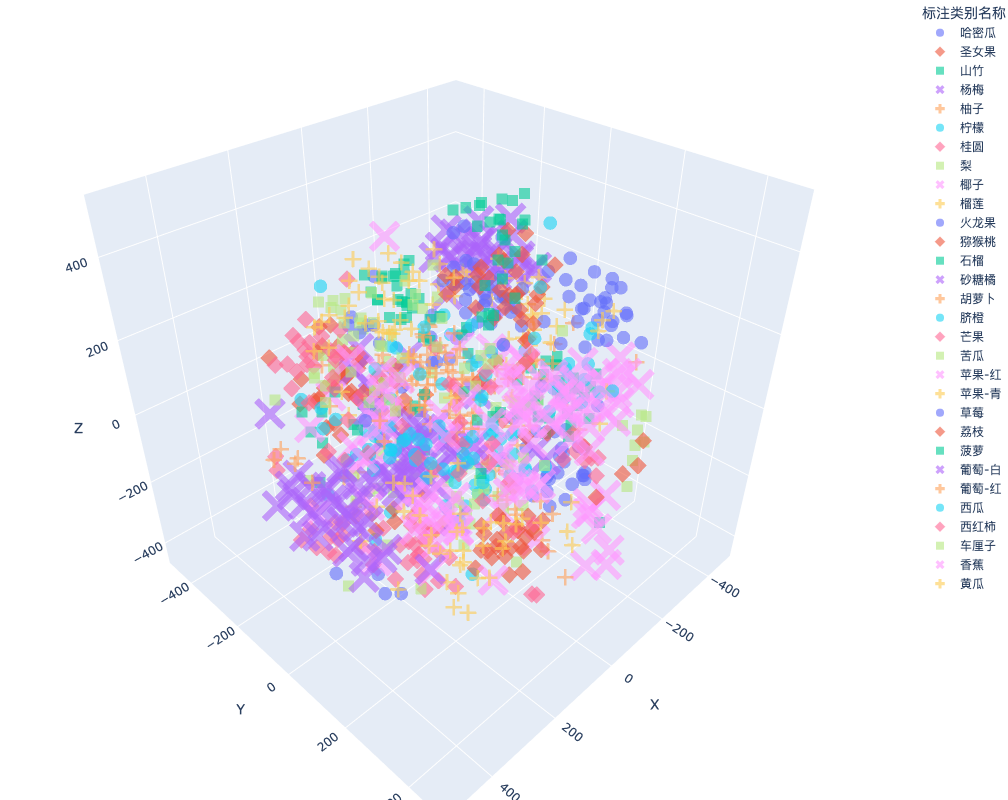

In [98]:
fig = px.scatter_3d(df_3d, 
                    x='X', 
                    y='Y', 
                    z='Z',
                    color=show_feature, 
                    labels=show_feature,
                    symbol=show_feature, 
                    hover_name='图像路径',
                    opacity=0.6,
                    width=1000, 
                    height=800)

# 设置排版
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()
fig.write_html('语义特征t-SNE三维降维plotly可视化.html')

### 测试集语义特征UMAP降维可视化

#### 安装UMAP

In [99]:
# 官方文档：https://umap-learn.readthedocs.io/en/latest/index.html
!pip install umap-learn datashader bokeh holoviews scikit-image colorcet

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     |████████████████████████████████| 88 kB 55.3 MB/s eta 0:00:01
     |████████████████████████████████| 18.2 MB 64.3 MB/s eta 0:00:01
     |████████████████████████████████| 18.5 MB 70.0 MB/s eta 0:00:01
     |████████████████████████████████| 4.3 MB 69.3 MB/s eta 0:00:01
     |████████████████████████████████| 1.7 MB 68.6 MB/s eta 0:00:01
     |████████████████████████████████| 3.5 MB 69.7 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 72.0 MB/s eta 0:00:01
     |████████████████████████████████| 34.6 MB 64.0 MB/s eta 0:00:01
     |████████████████████████████████| 87 kB 61.4 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 73.0 MB/s eta 0:00:01
     |████████████████████████████████| 76 kB 62.1 MB/s eta 0:00:01
     |████████████████████████████████| 55 kB 50.2 MB/s eta 0:00:01
     |████████████████████████████████| 845 kB 73.3 MB/s eta 0:00:01
     |████████████████████████████████| 17.

#### UMAP降维至二维可视化

In [101]:
import umap
import umap.plot

In [102]:
mapper = umap.UMAP(n_neighbors=10, n_components=2, random_state=12).fit(encoding_array)

In [103]:
mapper.embedding_.shape

(1078, 2)

In [104]:
X_umap_2d = mapper.embedding_

In [105]:
X_umap_2d.shape

(1078, 2)

In [106]:
# 不同的 符号 表示 不同的 标注类别
show_feature = '标注类别名称'

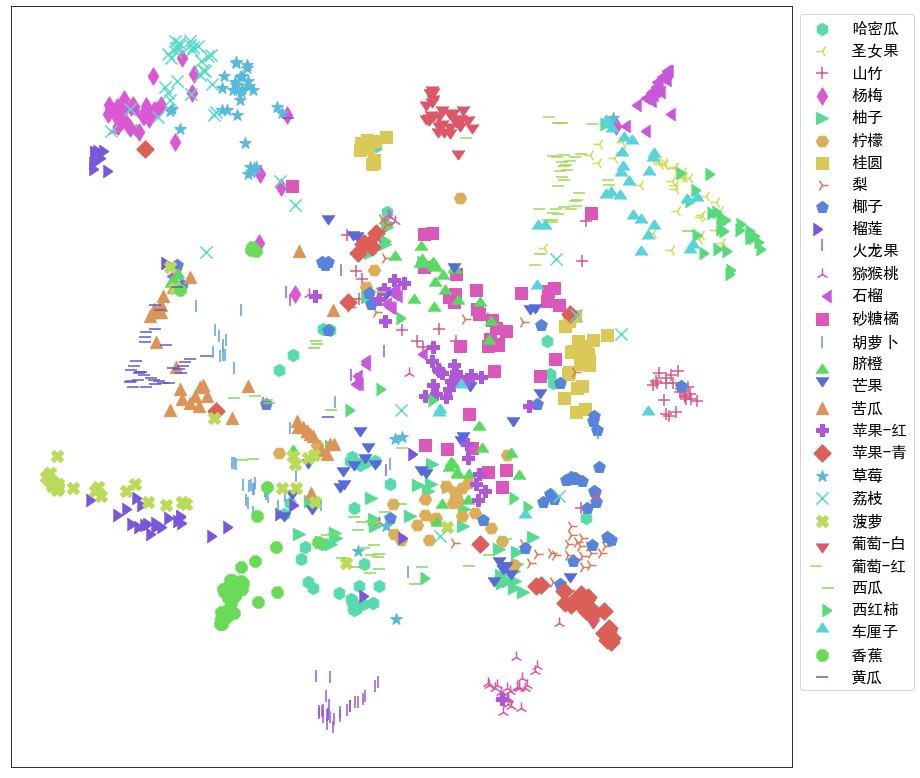

In [107]:
plt.figure(figsize=(14, 14))
for idx, fruit in enumerate(class_list): # 遍历每个类别
    # 获取颜色和点型
    color = palette[idx]
    marker = marker_list[idx%len(marker_list)]

    # 找到所有标注类别为当前类别的图像索引号
    indices = np.where(df[show_feature]==fruit)
    plt.scatter(X_umap_2d[indices, 0], X_umap_2d[indices, 1], color=color, marker=marker, label=fruit, s=150)

plt.legend(fontsize=16, markerscale=1, bbox_to_anchor=(1, 1))
plt.xticks([])
plt.yticks([])
plt.savefig('语义特征UMAP二维降维可视化.pdf', dpi=300) # 保存图像
plt.show()

#### 来了一张新图像，可视化语义特征

下载新图像

In [108]:
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/test/0818/test_kiwi.jpg

--2023-01-27 13:33:56--  https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/test/0818/test_kiwi.jpg
正在连接 172.16.0.13:5848... 已连接。
已发出 Proxy 请求，正在等待回应... 200 OK
长度： 1555297 (1.5M) [image/jpeg]
正在保存至: “test_kiwi.jpg”

test_kiwi.jpg       100%[===================>]   1.48M  5.05MB/s    用时 0.3s    

2023-01-27 13:33:57 (5.05 MB/s) - 已保存 “test_kiwi.jpg” [1555297/1555297])



导入模型、预处理

In [110]:
import cv2
import torch
from PIL import Image
from torchvision import transforms

# 有 GPU 就用 GPU，没有就用 CPU
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

model = torch.load('checkpoints/fruit30_pytorch_20220814.pth')
model = model.eval().to(device)

from torchvision.models.feature_extraction import create_feature_extractor
model_trunc = create_feature_extractor(model, return_nodes={'avgpool': 'semantic_feature'})

# 测试集图像预处理-RCTN：缩放、裁剪、转 Tensor、归一化
test_transform = transforms.Compose([transforms.Resize(256),
                                     transforms.CenterCrop(224),
                                     transforms.ToTensor(),
                                     transforms.Normalize(
                                         mean=[0.485, 0.456, 0.406], 
                                         std=[0.229, 0.224, 0.225])
                                    ])

计算新图像的语义特征

In [111]:
img_path = 'test_kiwi.jpg'
img_pil = Image.open(img_path)
input_img = test_transform(img_pil) # 预处理
input_img = input_img.unsqueeze(0).to(device)
# 执行前向预测，得到指定中间层的输出
pred_logits = model_trunc(input_img)
semantic_feature = pred_logits['semantic_feature'].squeeze().detach().cpu().numpy().reshape(1,-1)

In [112]:
semantic_feature.shape

(1, 512)

对新图像语义特征降维

In [113]:
# umap降维
new_embedding = mapper.transform(semantic_feature)[0]

In [114]:
new_embedding

array([9.998306 , 4.3254027], dtype=float32)

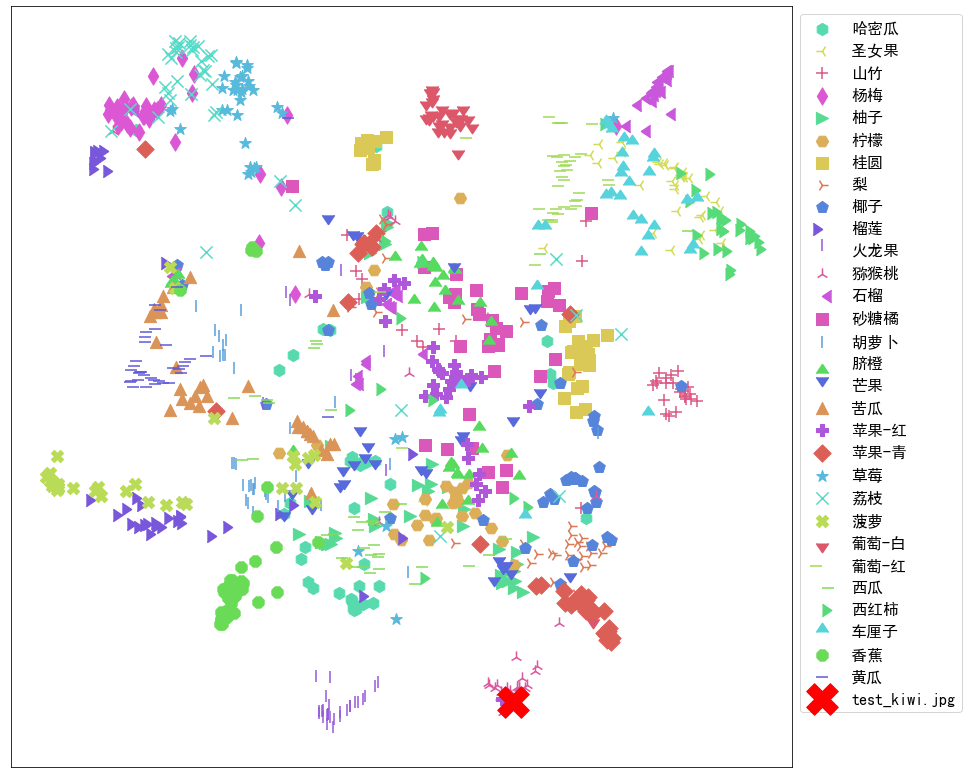

In [115]:
plt.figure(figsize=(14, 14))
for idx, fruit in enumerate(class_list): # 遍历每个类别
    # 获取颜色和点型
    color = palette[idx]
    marker = marker_list[idx%len(marker_list)]

    # 找到所有标注类别为当前类别的图像索引号
    indices = np.where(df[show_feature]==fruit)
    plt.scatter(X_umap_2d[indices, 0], X_umap_2d[indices, 1], color=color, marker=marker, label=fruit, s=150)

plt.scatter(new_embedding[0], new_embedding[1], color='r', marker='X', label=img_path, s=1000)

plt.legend(fontsize=16, markerscale=1, bbox_to_anchor=(1, 1))
plt.xticks([])
plt.yticks([])
plt.savefig('语义特征UMAP二维降维可视化-新图像.pdf', dpi=300) # 保存图像
plt.show()

#### plotply交互式可视化

In [116]:
import plotly.express as px

In [117]:
df_2d = pd.DataFrame()
df_2d['X'] = list(X_umap_2d[:, 0].squeeze())
df_2d['Y'] = list(X_umap_2d[:, 1].squeeze())
df_2d['标注类别名称'] = df['标注类别名称']
df_2d['预测类别'] = df['top-1-预测名称']
df_2d['图像路径'] = df['图像路径']
df_2d.to_csv('UMAP-2D.csv', index=False)

In [118]:
# 增加新图像的一行
new_img_row = {
    'X':new_embedding[0],
    'Y':new_embedding[1],
    '标注类别名称':img_path,
    '图像路径':img_path
}

df_2d = df_2d.append(new_img_row, ignore_index=True)

In [119]:
df_2d

X          Y         标注类别名称 预测类别                           图像路径
0      8.483788   5.696812            哈密瓜   柚子  fruit30_split/val/哈密瓜/106.jpg
1     10.393780   8.607638            哈密瓜   桂圆  fruit30_split/val/哈密瓜/109.jpg
2      8.437361   7.182105            哈密瓜  哈密瓜  fruit30_split/val/哈密瓜/114.jpg
3      7.592073   6.017258            哈密瓜  哈密瓜  fruit30_split/val/哈密瓜/116.jpg
4      8.569542  10.141388            哈密瓜   柚子  fruit30_split/val/哈密瓜/118.png
...         ...        ...            ...  ...                            ...
1074   5.923356   8.152048             黄瓜   黄瓜     fruit30_split/val/黄瓜/9.jpg
1075   5.827286   8.655960             黄瓜   黄瓜    fruit30_split/val/黄瓜/91.png
1076   5.895608   8.172974             黄瓜   黄瓜    fruit30_split/val/黄瓜/94.jpg
1077   5.828556   8.603112             黄瓜   黄瓜    fruit30_split/val/黄瓜/97.jpg
1078   9.998306   4.325403  test_kiwi.jpg  NaN                  test_kiwi.jpg

[1079 rows x 5 columns]

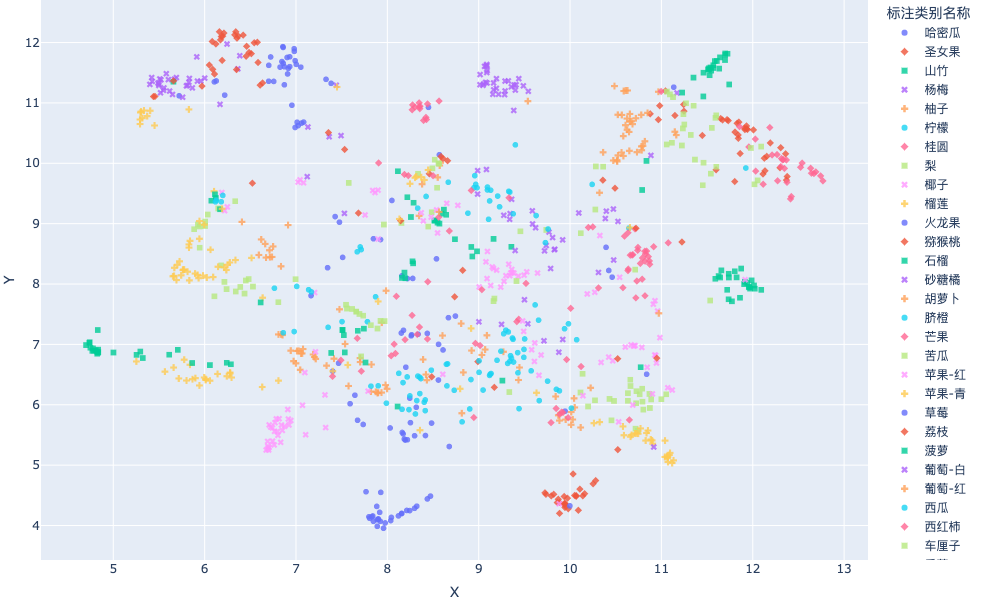

In [120]:
fig = px.scatter(df_2d, 
                 x='X', 
                 y='Y',
                 color=show_feature, 
                 labels=show_feature,
                 symbol=show_feature, 
                 hover_name='图像路径',
                 opacity=0.8,
                 width=1000, 
                 height=600
                )
# 设置排版
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()
fig.write_html('语义特征UMAP二维降维plotly可视化.html')

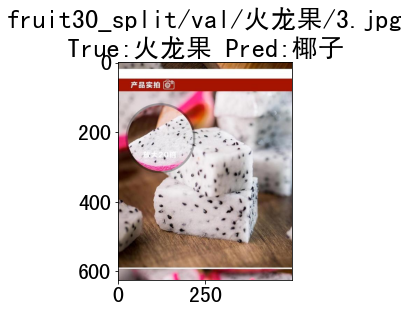

In [121]:
# 查看图像
img_path_temp = 'fruit30_split/val/火龙果/3.jpg'
img_bgr = cv2.imread(img_path_temp)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
temp_df = df[df['图像路径'] == img_path_temp]
title_str = img_path_temp + '\nTrue:' + temp_df['标注类别名称'].item() + ' Pred:' + temp_df['top-1-预测名称'].item()
plt.title(title_str)
plt.show()

#### UMAP降维至三维，并可视化

In [122]:
mapper = umap.UMAP(n_neighbors=10, n_components=3, random_state=12).fit(encoding_array)

In [123]:
X_umap_3d = mapper.embedding_

In [124]:
X_umap_3d.shape

(1078, 3)

In [125]:
show_feature = '标注类别名称'
# show_feature = '预测类别'

In [126]:
df_3d = pd.DataFrame()
df_3d['X'] = list(X_umap_3d[:, 0].squeeze())
df_3d['Y'] = list(X_umap_3d[:, 1].squeeze())
df_3d['Z'] = list(X_umap_3d[:, 2].squeeze())
df_3d['标注类别名称'] = df['标注类别名称']
df_3d['预测类别'] = df['top-1-预测名称']
df_3d['图像路径'] = df['图像路径']
df_3d.to_csv('UMAP-3D.csv', index=False)

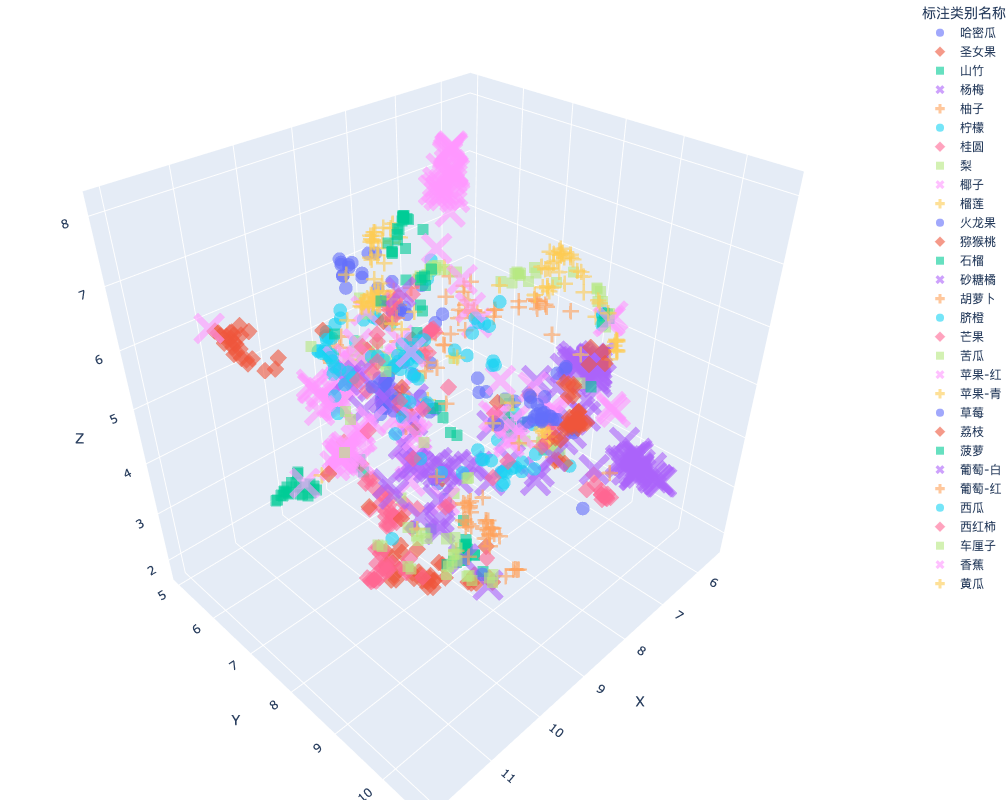

In [127]:
fig = px.scatter_3d(df_3d, 
                    x='X', 
                    y='Y', 
                    z='Z',
                    color=show_feature, 
                    labels=show_feature,
                    symbol=show_feature, 
                    hover_name='图像路径',
                    opacity=0.6,
                    width=1000, 
                    height=800)

# 设置排版
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()
fig.write_html('语义特征UMAP三维降维plotly可视化.html')

#### 来了一张新图像，可视化语义特征

In [128]:
# umap降维
new_embedding = mapper.transform(semantic_feature)[0]

In [129]:
# 增加新图像的一行
new_img_row = {
    'X':new_embedding[0],
    'Y':new_embedding[1],
    'Z':new_embedding[2],
    '标注类别名称':img_path,
    '图像路径':img_path
}

df_3d = df_3d.append(new_img_row, ignore_index=True)

In [130]:
df_3d

X         Y         Z         标注类别名称 预测类别  \
0      9.666985  6.668339  6.703173            哈密瓜   柚子   
1     10.303848  9.252699  4.841348            哈密瓜   桂圆   
2      9.355103  7.413783  6.509976            哈密瓜  哈密瓜   
3      9.108455  6.344750  6.535096            哈密瓜  哈密瓜   
4      8.674203  9.771084  4.962316            哈密瓜   柚子   
...         ...       ...       ...            ...  ...   
1074   7.873638  8.842519  7.226737             黄瓜   黄瓜   
1075   7.659391  9.196207  7.077159             黄瓜   黄瓜   
1076   7.947802  8.964104  7.327849             黄瓜   黄瓜   
1077   7.712974  9.124099  7.152270             黄瓜   黄瓜   
1078  11.968940  7.268644  6.990339  test_kiwi.jpg  NaN   

                               图像路径  
0     fruit30_split/val/哈密瓜/106.jpg  
1     fruit30_split/val/哈密瓜/109.jpg  
2     fruit30_split/val/哈密瓜/114.jpg  
3     fruit30_split/val/哈密瓜/116.jpg  
4     fruit30_split/val/哈密瓜/118.png  
...                             ...  
1074     fruit30_split/val/黄瓜/9.jpg  
1075    fruit30_split/val/黄瓜/91.png  
1076    fruit30_split/val/黄瓜/94.jpg  
1077    fruit30_split/val/黄瓜/97.jpg  
1078                  test_kiwi.jpg  

[1079 rows x 6 columns]

In [131]:
fig = px.scatter_3d(df_3d, 
                    x='X', 
                    y='Y', 
                    z='Z',
                    color=show_feature, 
                    labels=show_feature,
                    symbol=show_feature, 
                    hover_name='图像路径',
                    opacity=0.6,
                    width=1000, 
                    height=800)

# 设置排版
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()
fig.write_html('语义特征UMAP三维降维plotly可视化.html')